<h1 style="color:blue; font-family:Arial Black; background:lightgreen; line-height:2; text-align:center; font-size:40px"> Startup Status Prediction Project</h1>

<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Project Description</h2>
<h3 style="color:gray; line-height:1.5">The investments series at a company level are given. The company status are given - the interesting
challenge would be discover if the investments and other criteria help company to be a operating/closed/acquired stage.</h3>

<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Dataset Description</h2>
<h3 style="color:gray; line-height:1.3"><b style="color:orange">1. permalink :</b> This column contains the unique identifier for each startup. It is a string value.<br>
    <b style="color:orange">2. name :</b> This column contains the name of each startup. It is a string value.<br>
    <b style="color:orange">3. homepage_url :</b> This column contains the URL of the startup's website. It is a string value.<br>
    <b style="color:orange">4. category_list :</b> This column contains a list of categories or industries that the startup operates in. It is a
string value.<br>
    <b style="color:orange">5. market :</b> This column contains a description of the market or industry that the startup operates in. It is
a string value.<br>
    <b style="color:orange">6. funding_total_usd :</b> This column contains the total funding amount in US dollars that the startup has
received. It is a numeric value.<br>
    <b style="color:orange">7. status :</b> This column contains the current status of the startup (e.g. operating, closed, acquired). It is a
string value. This is the target column that has to be predicted.<br>
    <b style="color:orange">8. country_code :</b> This column contains the two-letter country code for the country where the startup is
headquartered. It is a string value.<br>
    <b style="color:orange">9. state_code :</b> This column contains the two-letter state code for the state where the startup is
headquartered (if applicable). It is a string value.<br>
    <b style="color:orange">10. region :</b> This column contains the region where the startup is headquartered. It is a string value.<br>
    <b style="color:orange">11. city </b>: This column contains the city where the startup is headquartered. It is a string value.<br>
        <b style="color:orange">12. funding_rounds :</b> This column contains the number of funding rounds that the startup has gone through. It is a numeric value.<br>
        <b style="color:orange">13. founded_at :</b> This column contains the date when the startup was founded. It is a string value in the
format "YYYY-MM-DD".<br>
        <b style="color:orange">14. founded_month :</b> This column contains the month when the startup was founded. It is a numeric
value.<br>
        <b style="color:orange">15. founded_quarter :</b> This column contains the quarter when the startup was founded. It is a string
value.<br>
    <b style="color:orange">16. founded_year :</b> This column contains the year when the startup was founded. It is a numeric value.<br>
    <b style="color:orange">17. first_funding_at :</b> This column contains the date of the startup's first funding round. It is a string value
in the format "YYYY-MM-DD".<br>
    <b style="color:orange">18. last_funding_at :</b> This column contains the date of the startup's most recent funding round. It is a
string value in the format "YYYY-MM-DD".<br>
    <b style="color:orange">19. seed, venture, equity_crowdfunding, undisclosed, convertible_note, debt_financing, angel, grant, private_equity, post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding, round_A, round_B, round_C, round_D, round_E, round_F, round_G, round_H :</b> These columns contain the funding amounts in US dollars for each type of
funding round that the startup has gone through. They are all numeric values. If a funding round did not
occur, the value will be null or 0</h3>

<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Import Basic Required Libraries</h2>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Load Dataset</h2>

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/data/Investments_VC.csv', encoding='latin1')
pd.options.display.max_columns=50
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Understand Dataset</h2>

In [7]:
df.shape

(54294, 39)

In [8]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Statistical Info</h2>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,49438.0,1.696205e+00,1.294213e+00,1.0,1.0,1.0,2.0,1.800000e+01
founded_year,38482.0,2.007359e+03,7.579203e+00,1902.0,2006.0,2010.0,2012.0,2.014000e+03
seed,49438.0,2.173215e+05,1.056985e+06,0.0,0.0,0.0,25000.0,1.300000e+08
venture,49438.0,7.501051e+06,2.847112e+07,0.0,0.0,0.0,5000000.0,2.351000e+09
equity_crowdfunding,49438.0,6.163322e+03,1.999048e+05,0.0,0.0,0.0,0.0,2.500000e+07
undisclosed,49438.0,1.302213e+05,2.981404e+06,0.0,0.0,0.0,0.0,2.924328e+08
convertible_note,49438.0,2.336410e+04,1.432046e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,49438.0,1.888157e+06,1.382046e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,49438.0,6.541898e+04,6.582908e+05,0.0,0.0,0.0,0.0,6.359026e+07
grant,49438.0,1.628453e+05,5.612088e+06,0.0,0.0,0.0,0.0,7.505000e+08


In [11]:
df.describe(include='object').T

,count,unique,top,freq
permalink,49438,49436,/organization/treasure-valley-urology-services,2
name,49437,49350,Roost,4
homepage_url,45989,45850,http://spaceport.io,2
category_list,45477,16675,|Software|,3650
market,45470,753,Software,4620
funding_total_usd,49438,14617,-,8531
status,48124,3,operating,41829
country_code,44165,115,USA,28793
state_code,30161,61,CA,9917
region,44165,1089,SF Bay Area,6804


<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Duplicate Rows</h2>

In [12]:
df.duplicated().sum()

4855

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Missing values</h2>

In [14]:
df.isna().sum()

permalink                   1
name                        2
homepage_url             3450
category_list            3962
 market                  3969
 funding_total_usd          1
status                   1315
country_code             5274
state_code              19278
region                   5274
city                     6117
funding_rounds              1
founded_at              10885
founded_month           10957
founded_quarter         10957
founded_year            10957
first_funding_at            1
last_funding_at             1
seed                        1
venture                     1
equity_crowdfunding         1
undisclosed                 1
convertible_note            1
debt_financing              1
angel                       1
grant                       1
private_equity              1
post_ipo_equity             1
post_ipo_debt               1
secondary_market            1
product_crowdfunding        1
round_A                     1
round_B                     1
round_C   

### Drop the missing values wrt our target variable.

In [15]:
data=df[~df['status'].isna()]
data.isna().sum()

permalink                   0
name                        1
homepage_url             3377
category_list            3582
 market                  3589
 funding_total_usd          0
status                      0
country_code             5067
state_code              18574
region                   5067
city                     5857
funding_rounds              0
founded_at              10488
founded_month           10560
founded_quarter         10560
founded_year            10560
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C   

### Drop some unwanted columns.

In [16]:
unwanted_columns=['permalink','homepage_url','state_code','founded_month','founded_quarter','founded_year']
data.drop(unwanted_columns, axis=1, inplace=True)
data.columns

Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [17]:
data=data[~data['country_code'].isna()]
data.isna().sum()

name                       0
category_list           2577
 market                 2580
 funding_total_usd         0
status                     0
country_code               0
region                     0
city                     790
funding_rounds             0
founded_at              8362
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B                    0
round_C                    0
round_D                    0
round_E                    0
round_F                    0
round_G                    0
round_H                    0
dtype: int64

In [18]:
data.dropna(inplace=True)
data.shape

(32822, 33)

In [19]:
for col in data.columns:
    if data[col].isna().sum()!=0:
        print(col)
else:
    print("No missing values")

No missing values


<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Exploratory Data Analysis</h2>

<h2 style="color:blue; background:lightblue; line-height:1.5;">Analyzing All numerical columns</h2>

<h2 style="color:blue; background:lightgreen; line-height:1.5;">1. Data Distribution in All numerical columns</h2>

<Figure size 640x480 with 0 Axes>

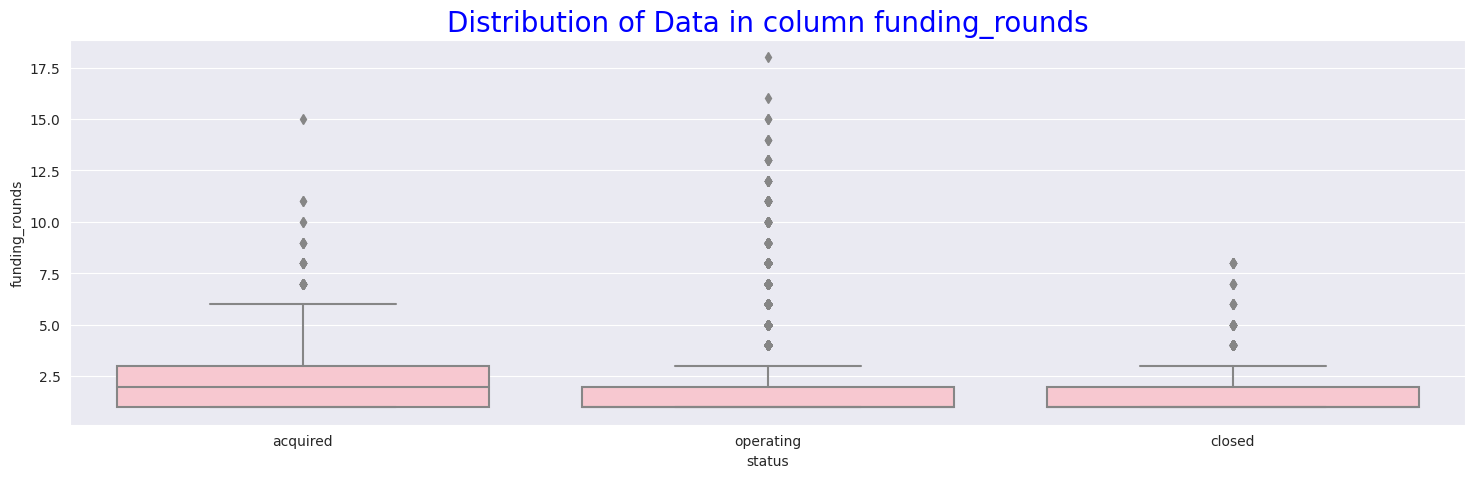

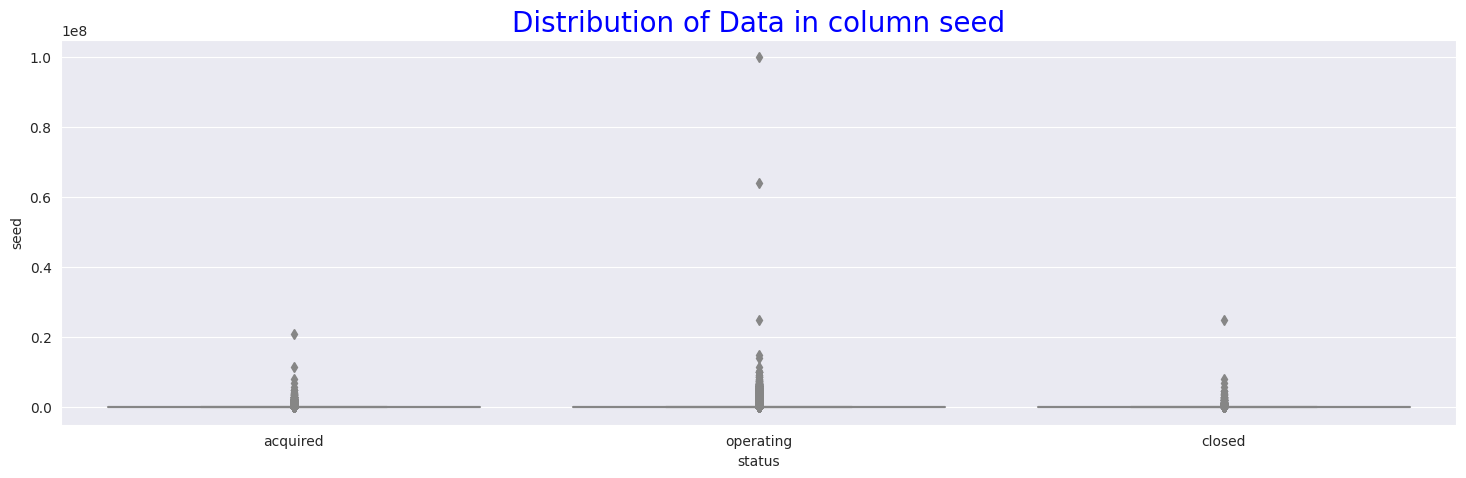

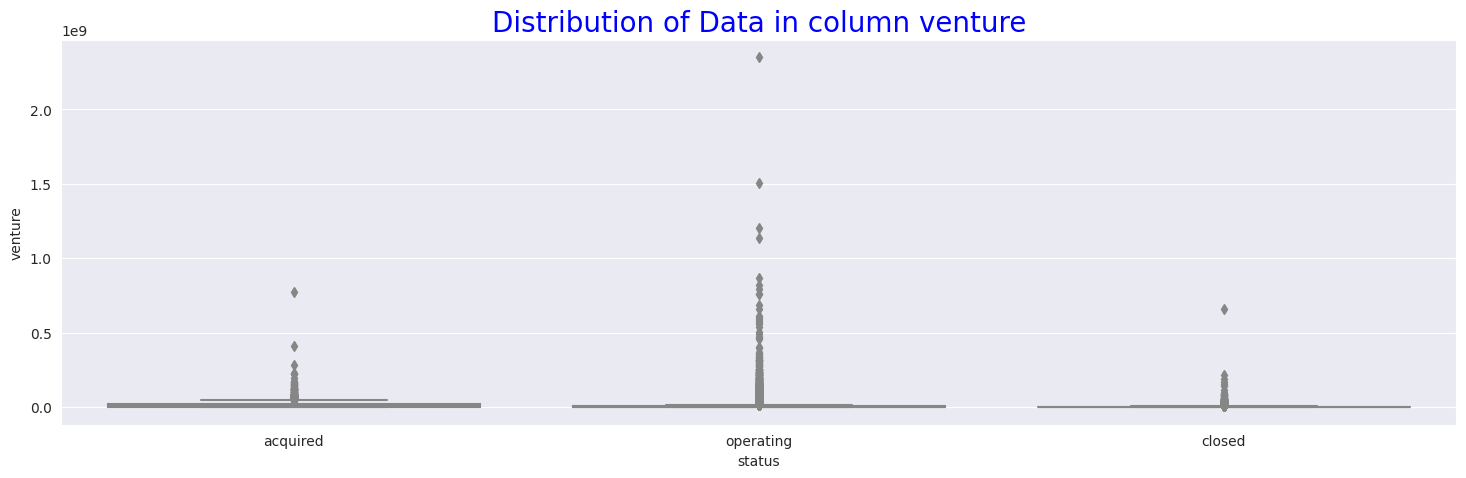

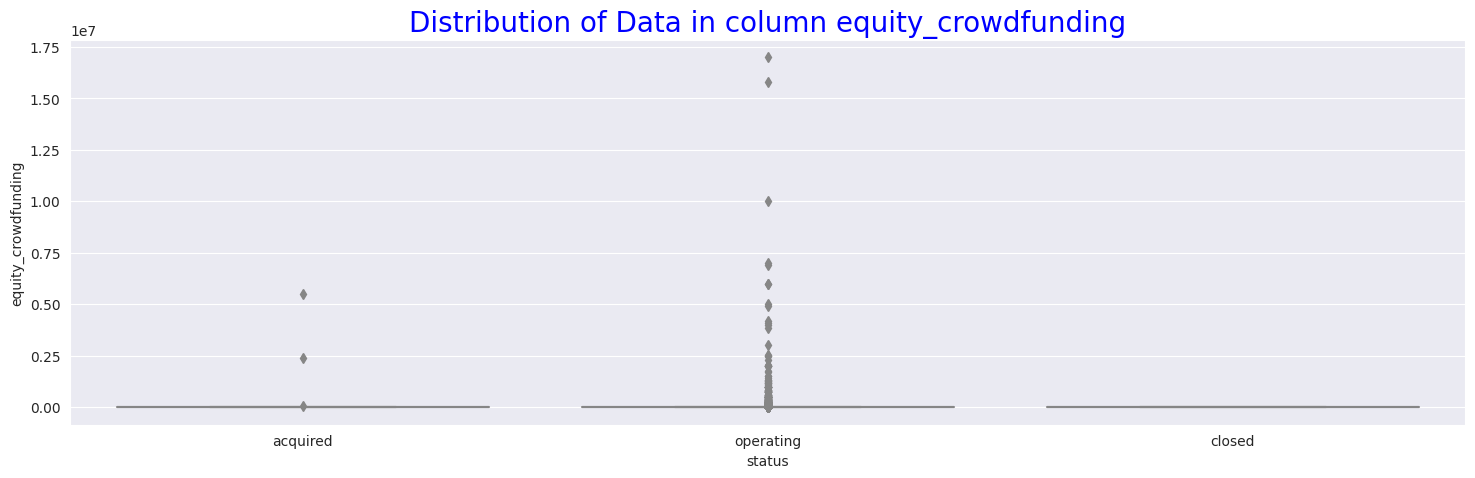

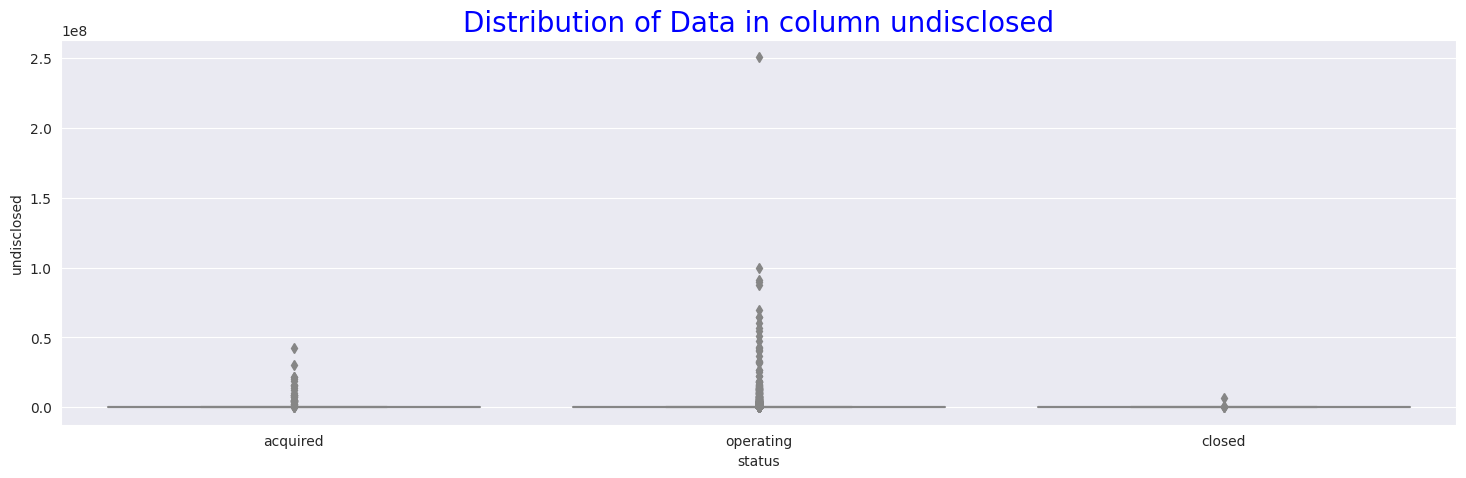

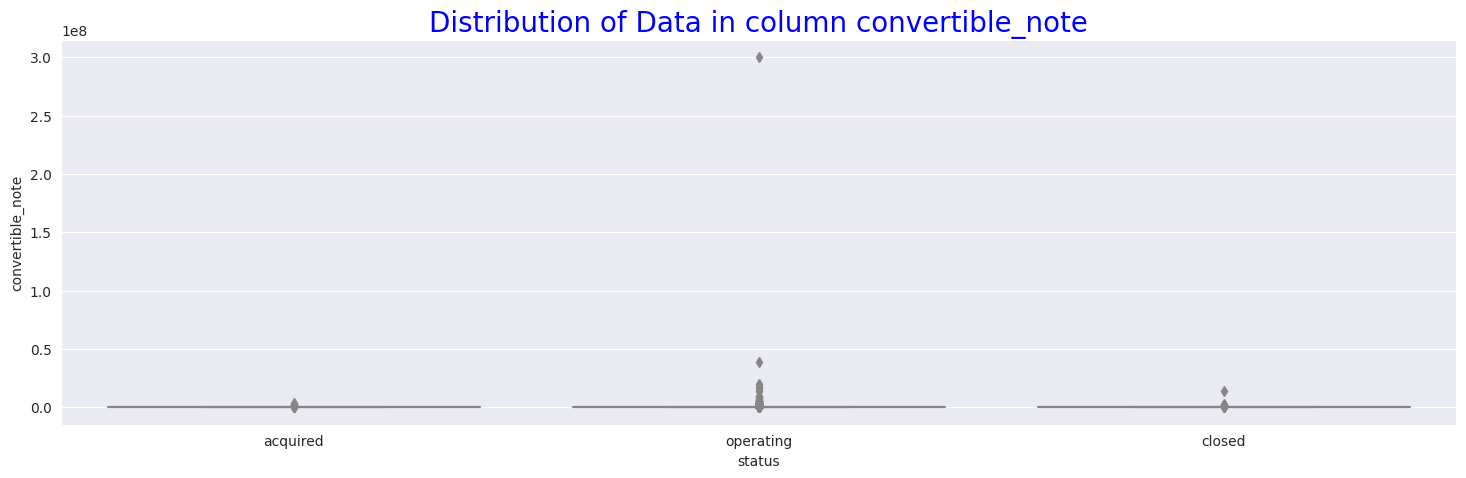

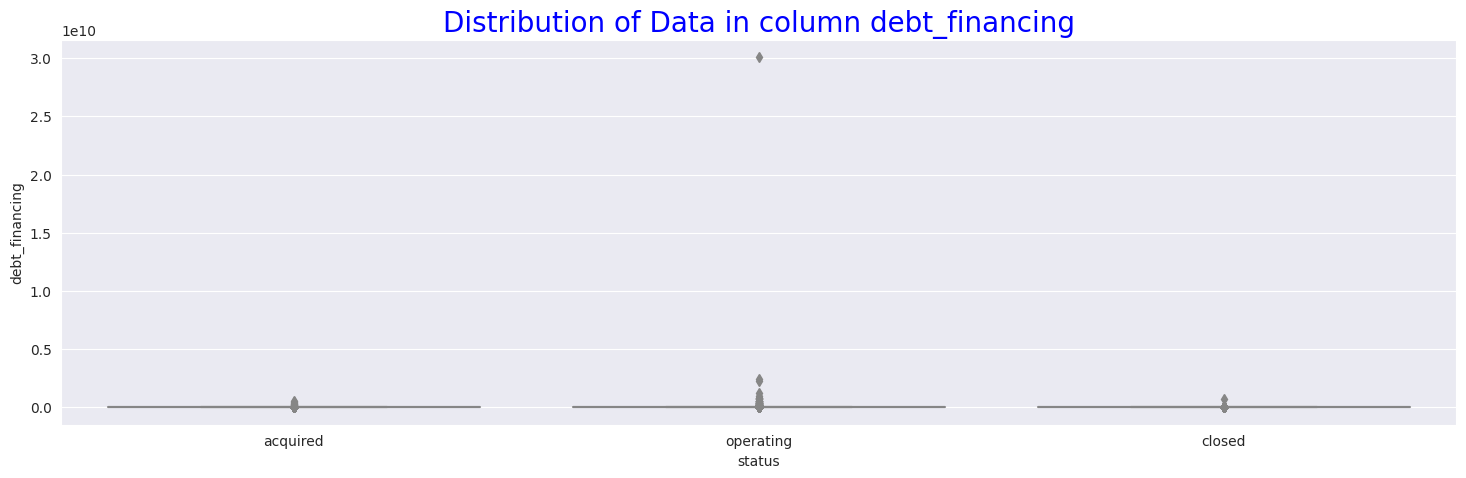

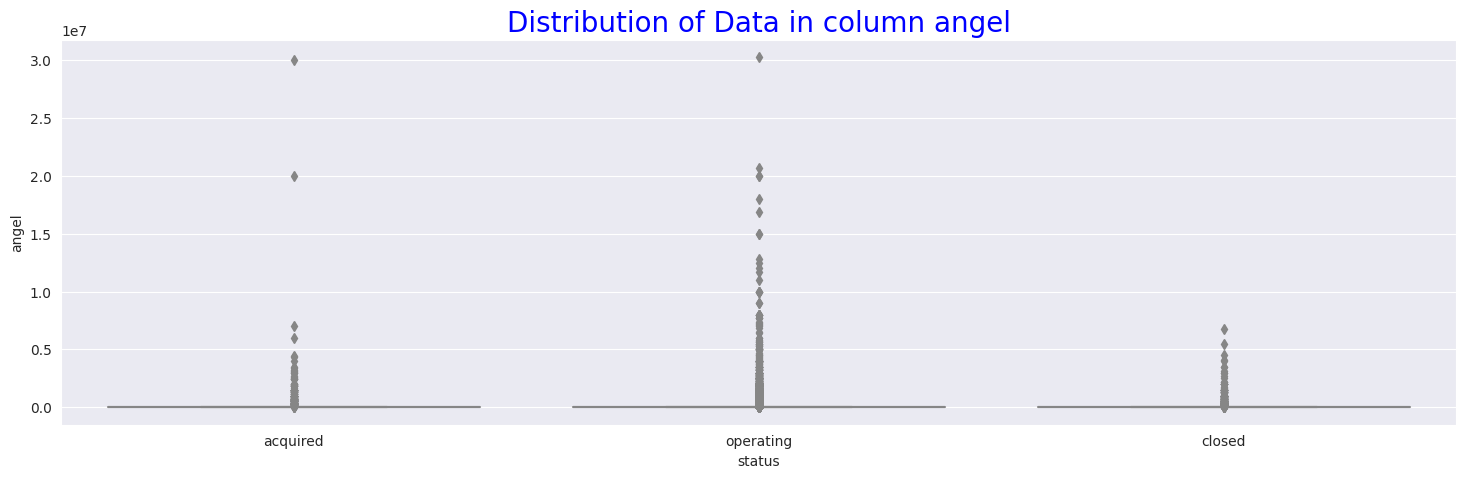

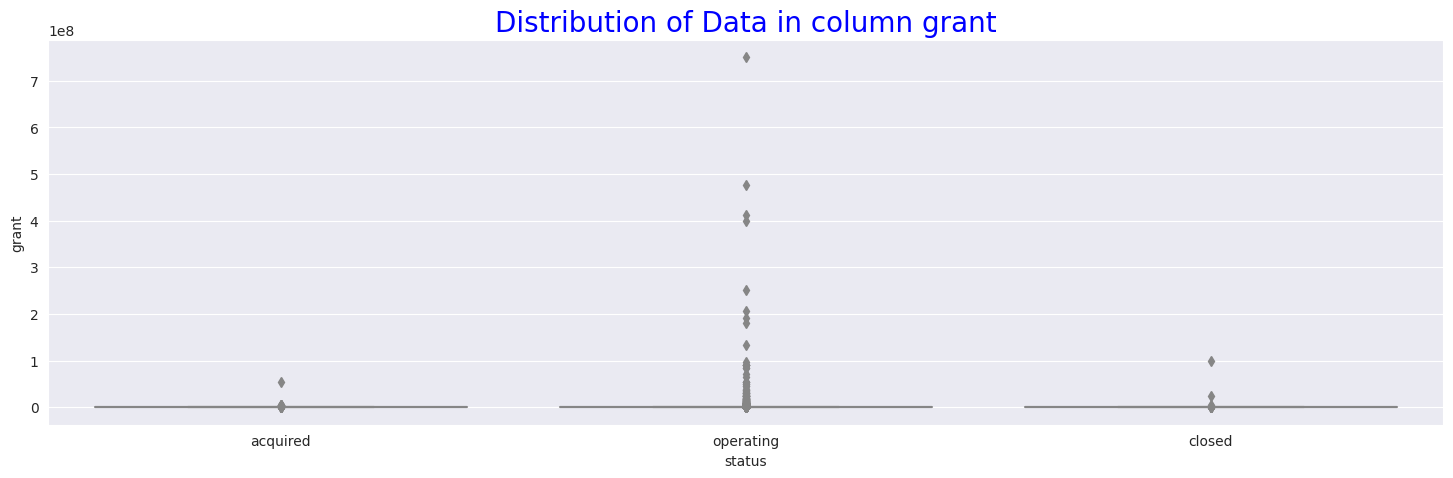

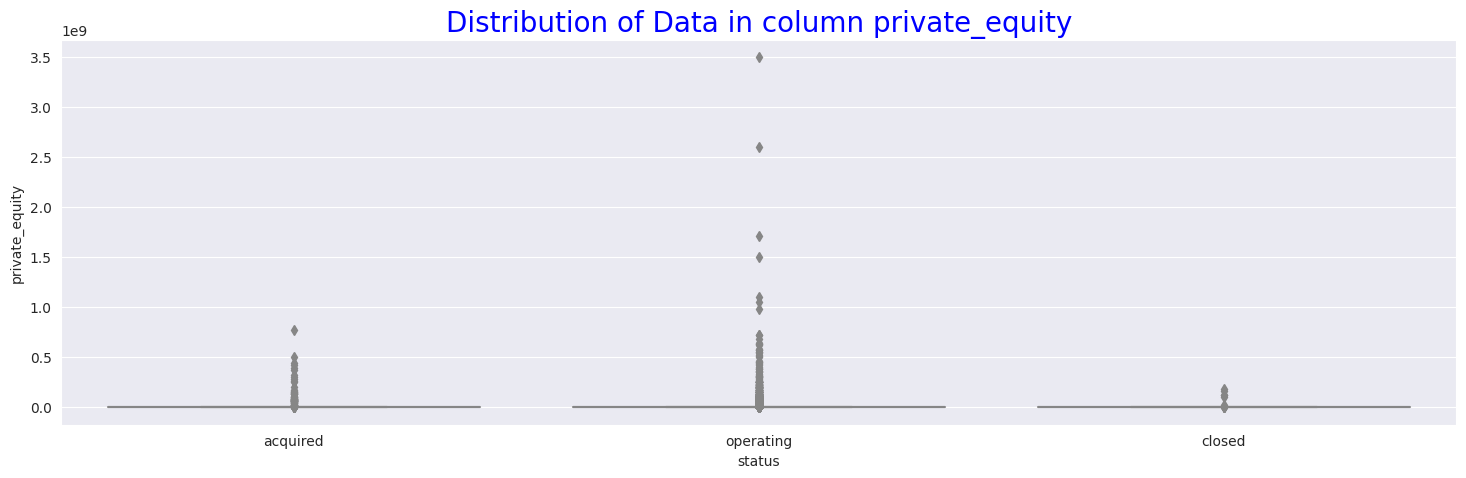

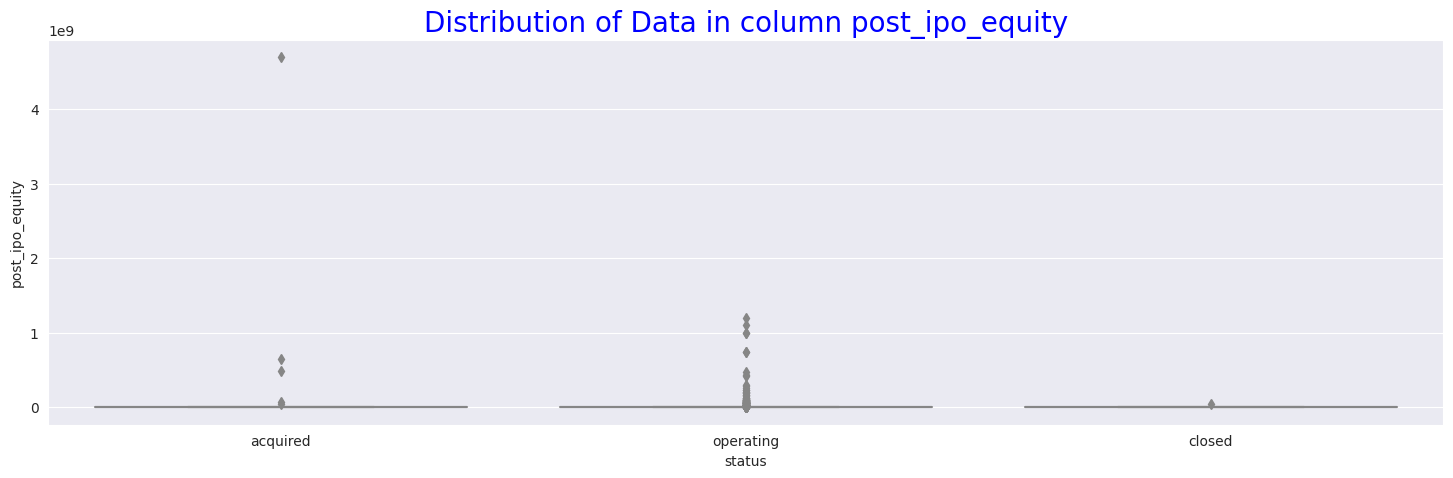

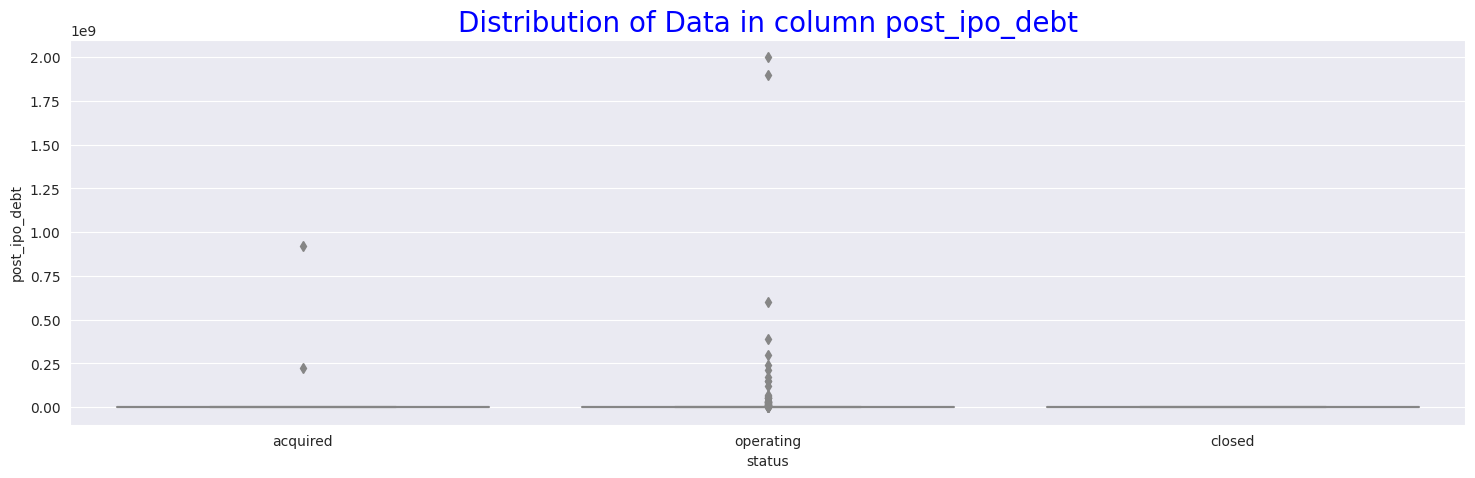

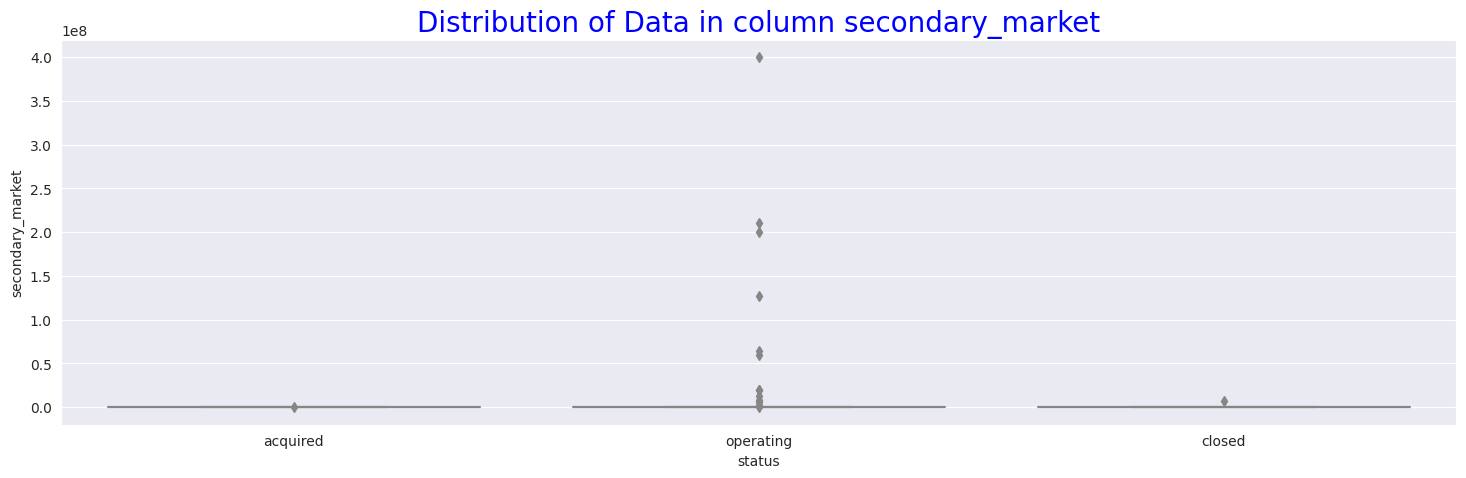

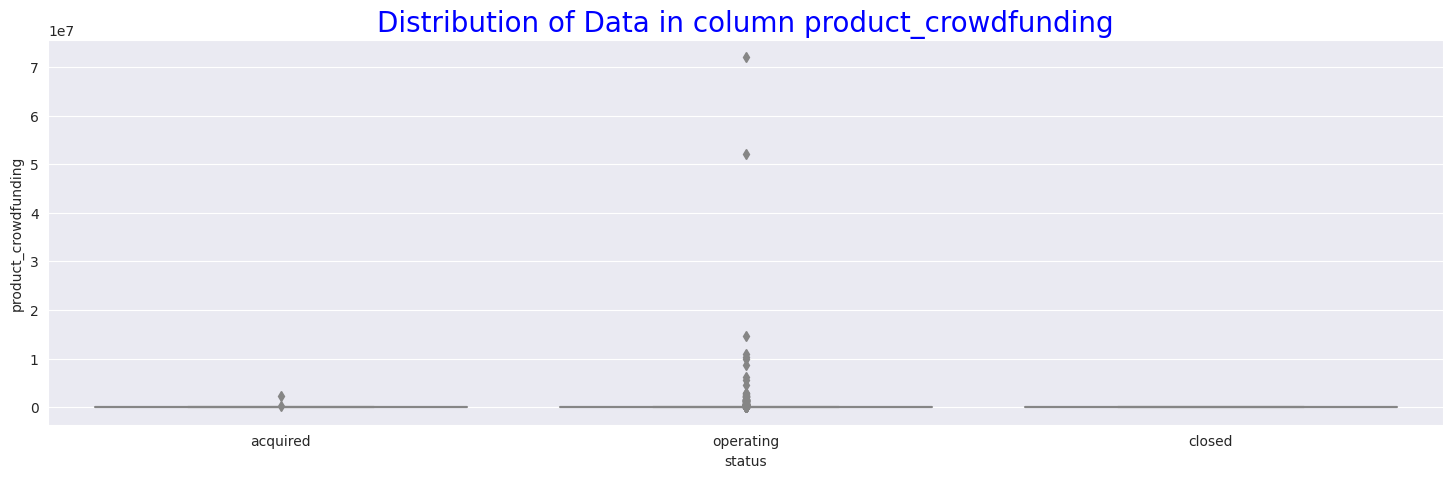

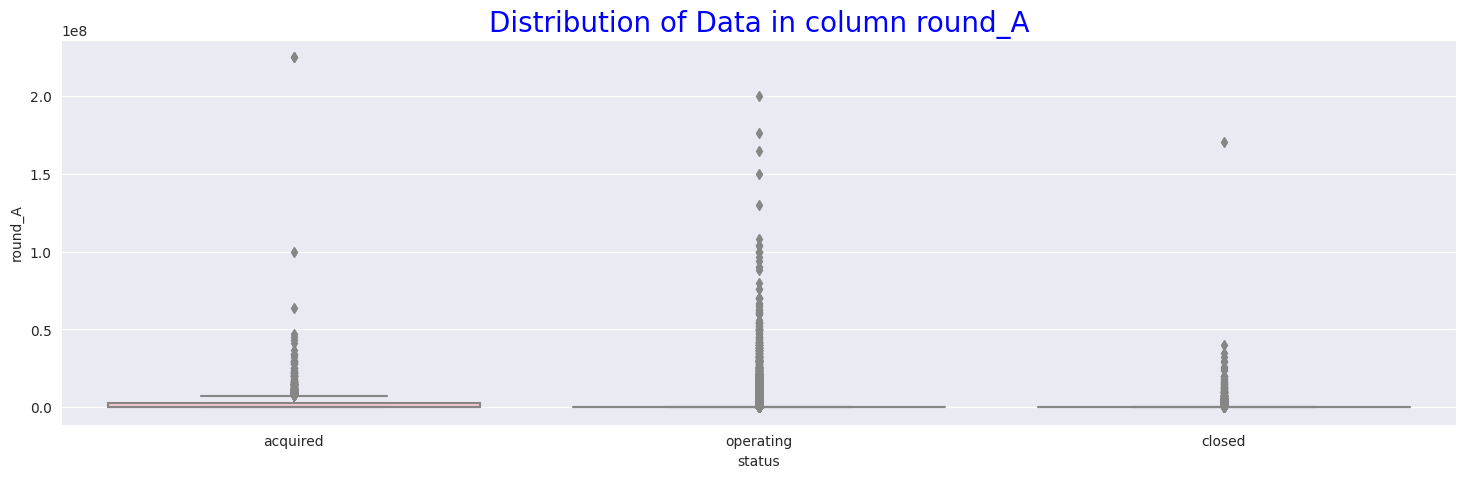

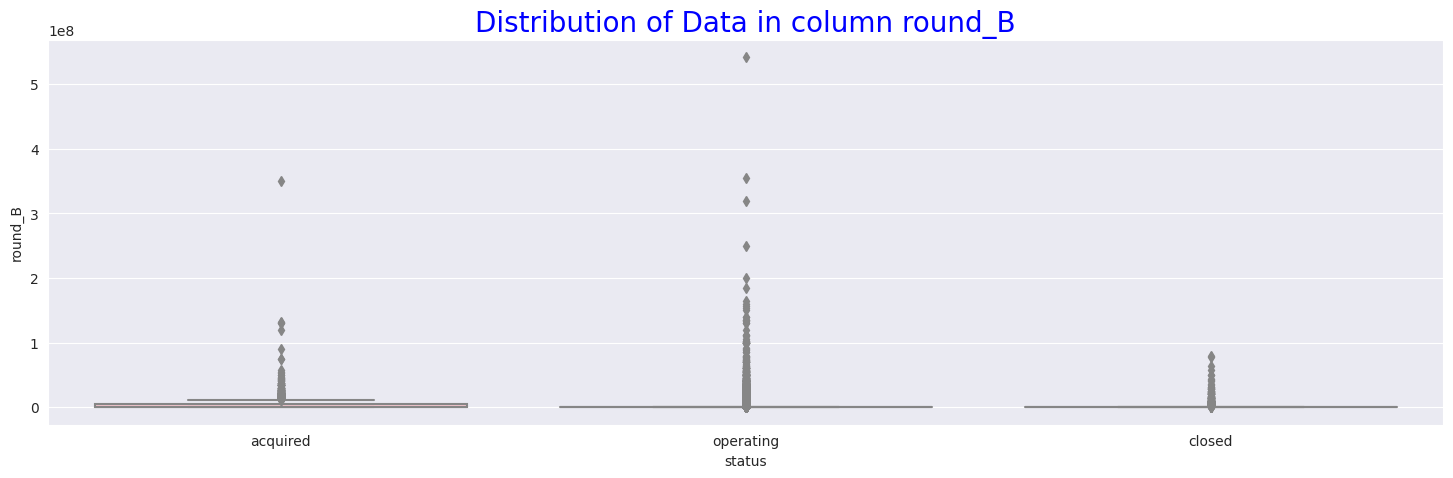

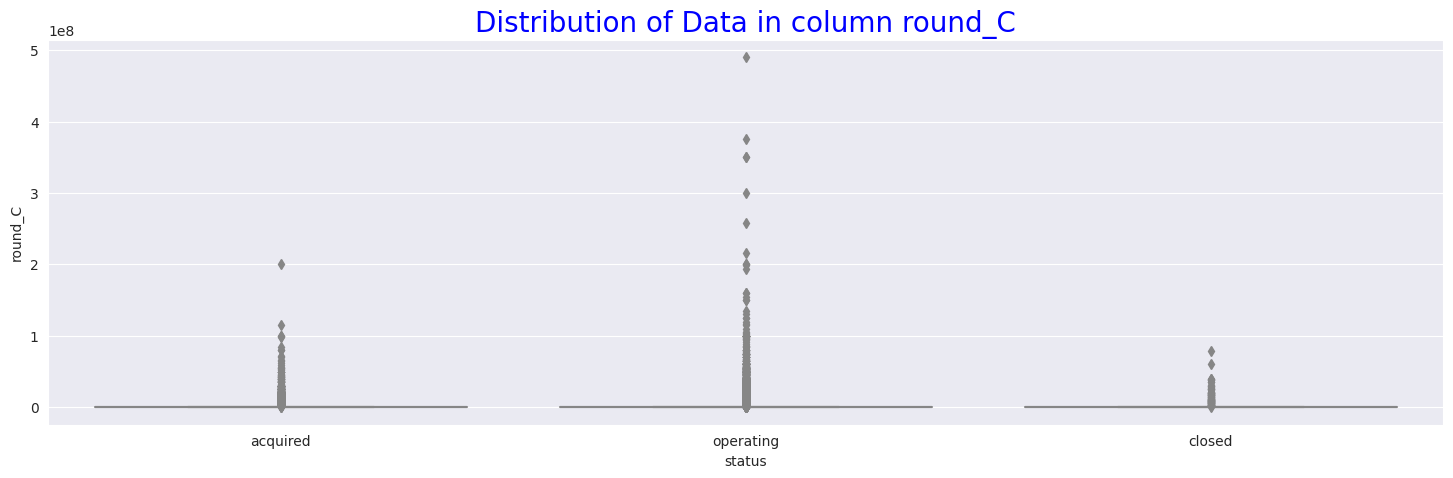

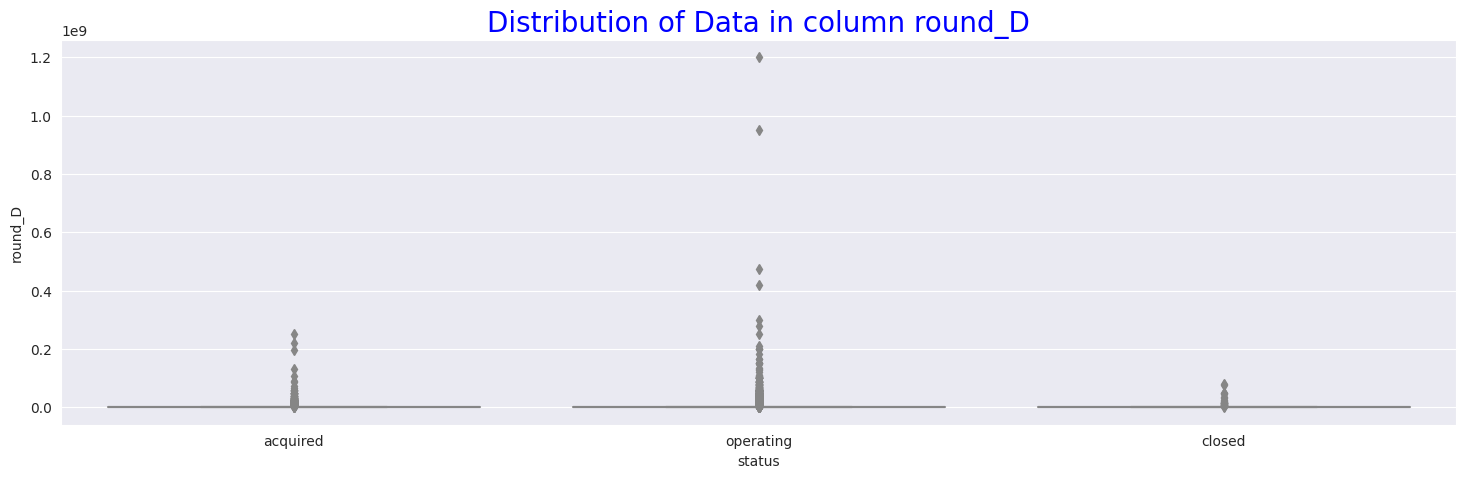

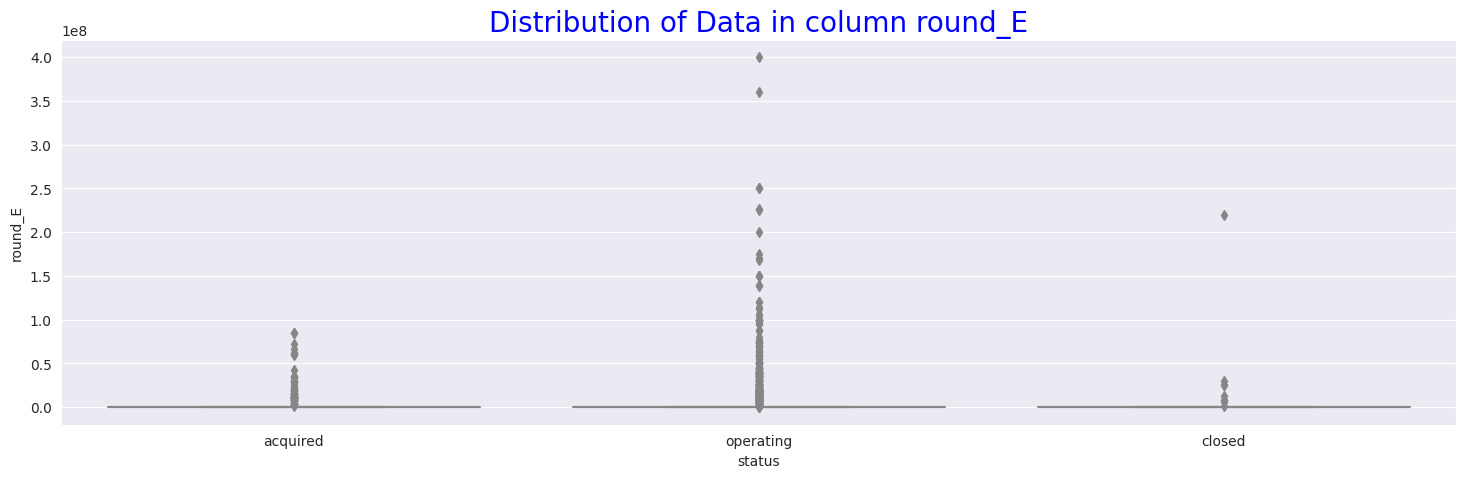

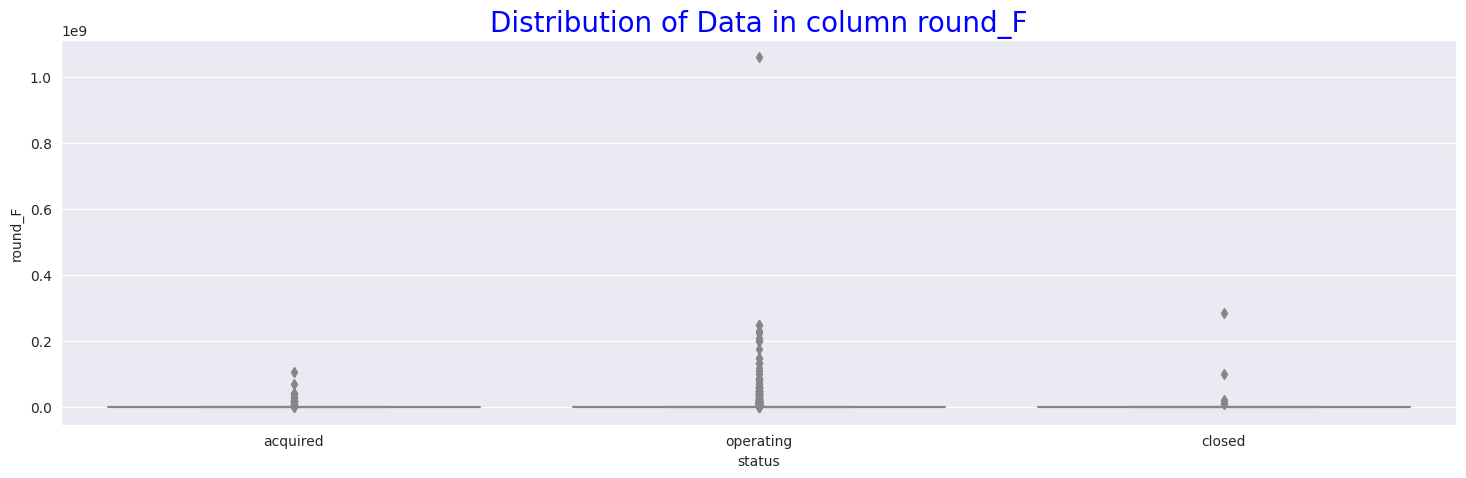

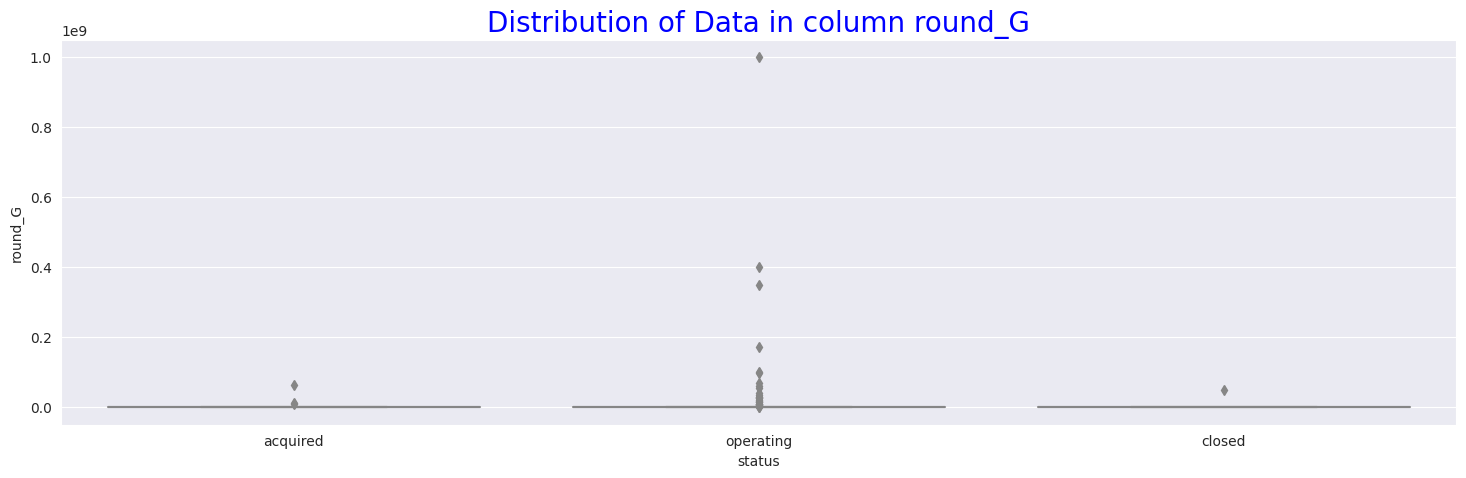

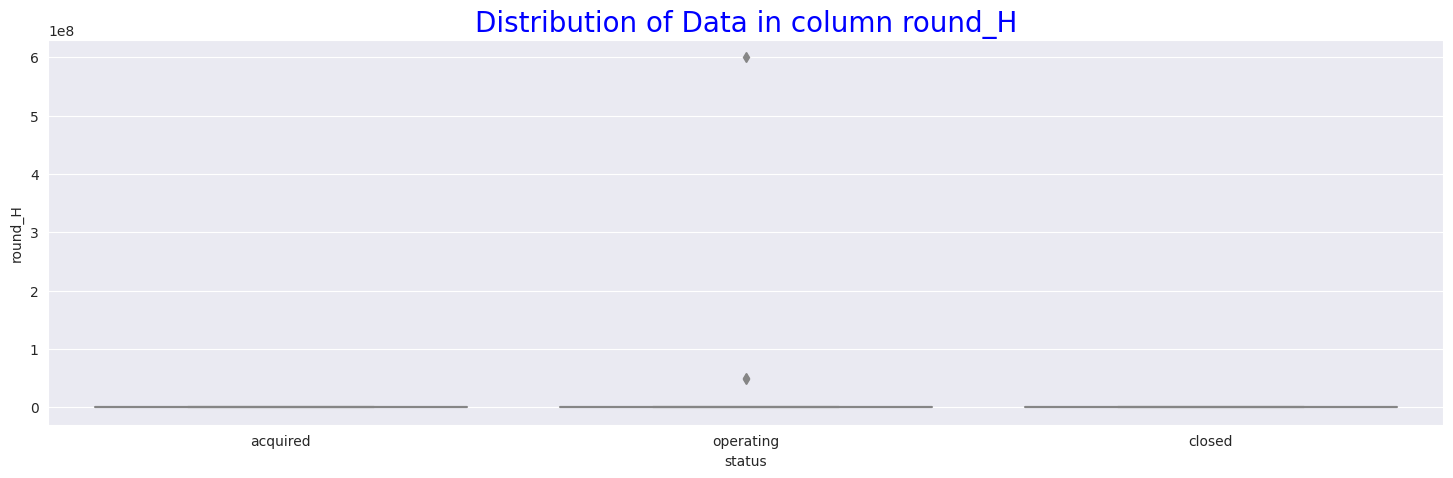

In [20]:
df1 = data.select_dtypes([int, float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.figure(figsize=(18,5))
    sns.boxplot(y=df1[col], x=data['status'],  color='pink');
    plt.title("Distribution of Data in column {}".format(col), fontsize=20, color='blue', fontweight=20)

<h3 style="color:green">Definetely there are many outliers in the Numerical columns</h3>

<Figure size 640x480 with 0 Axes>

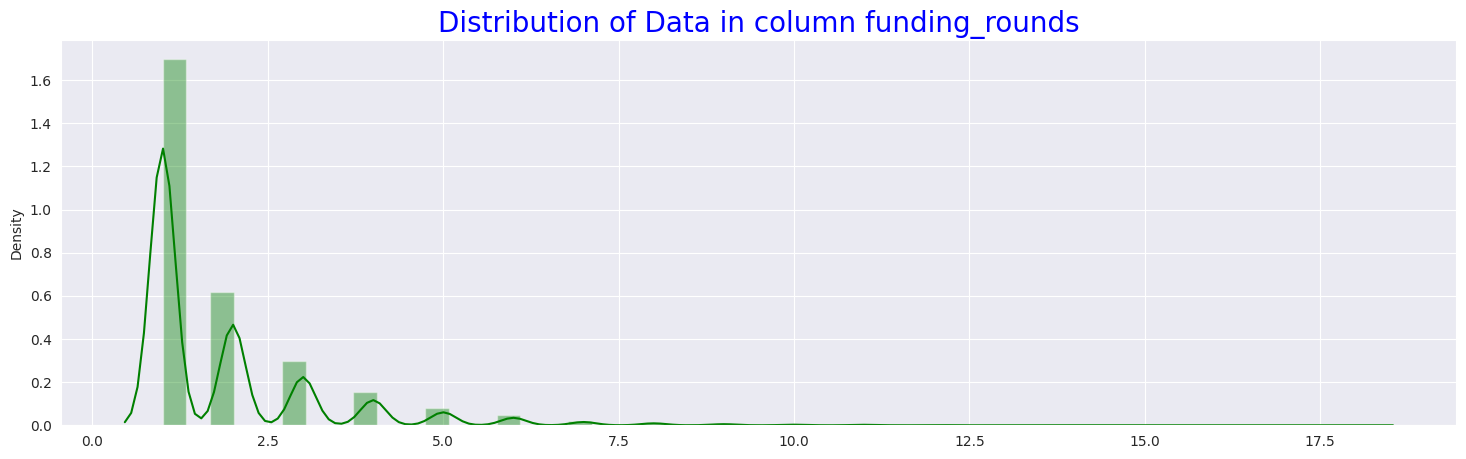

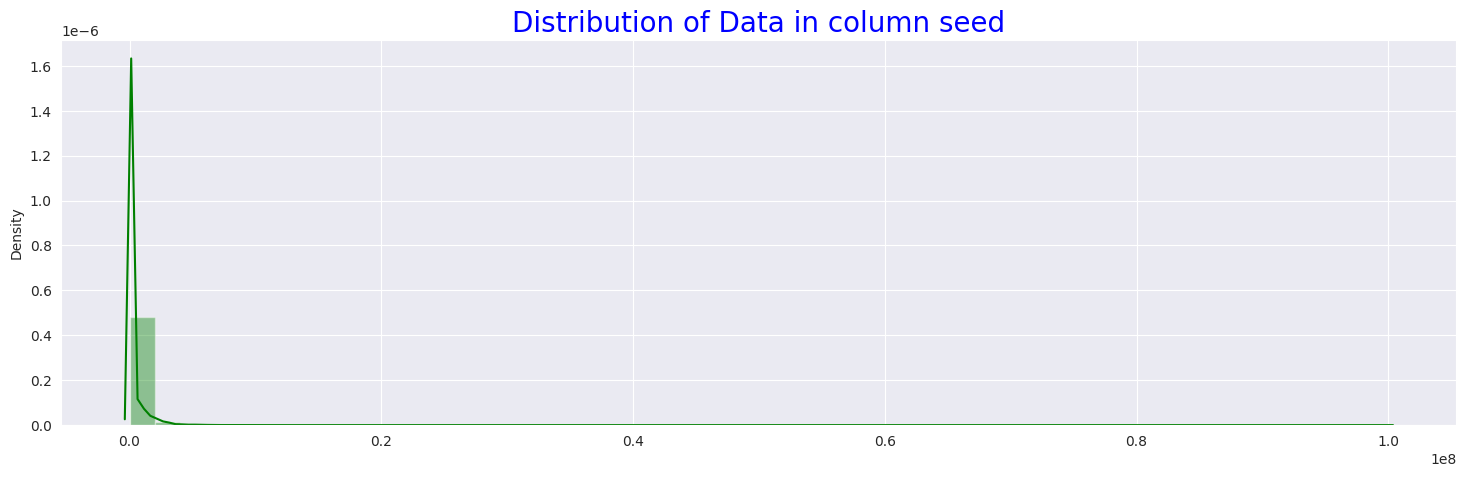

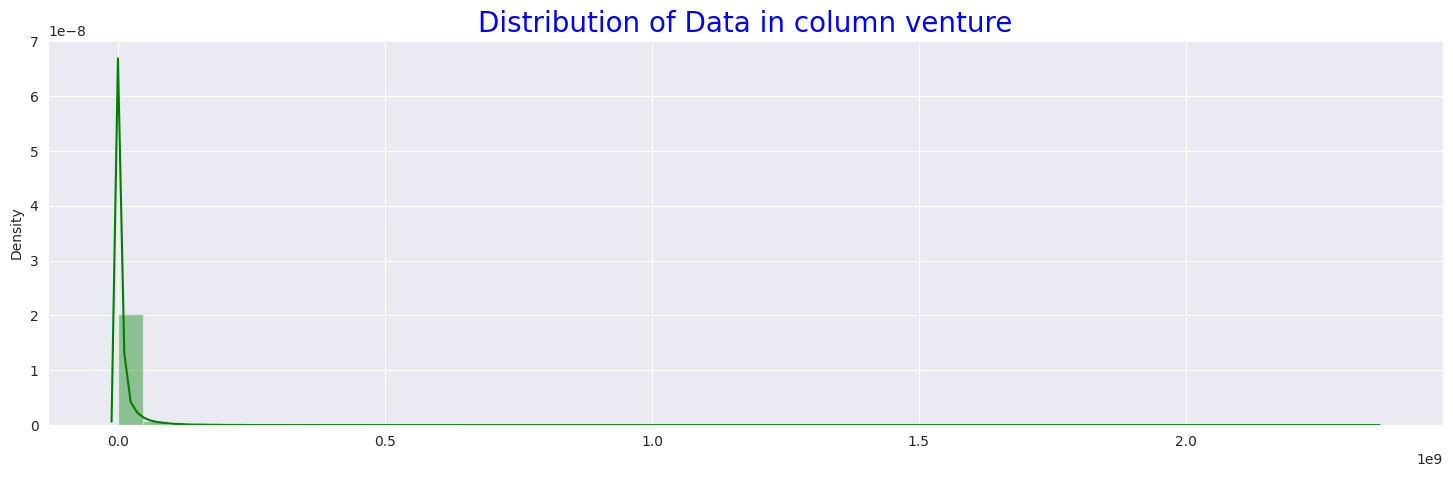

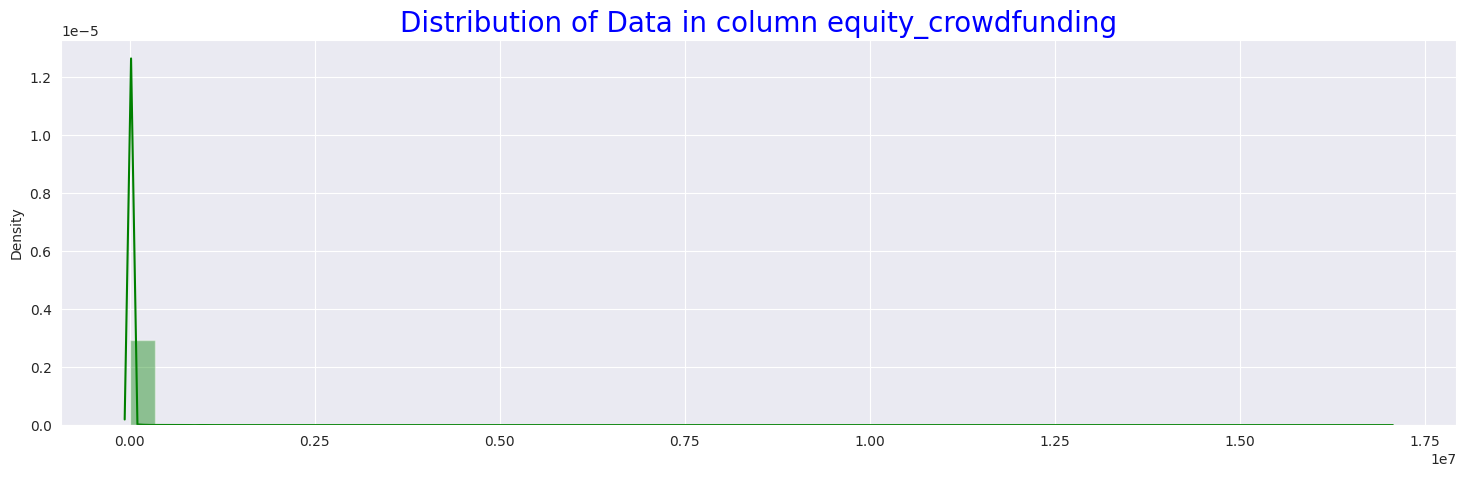

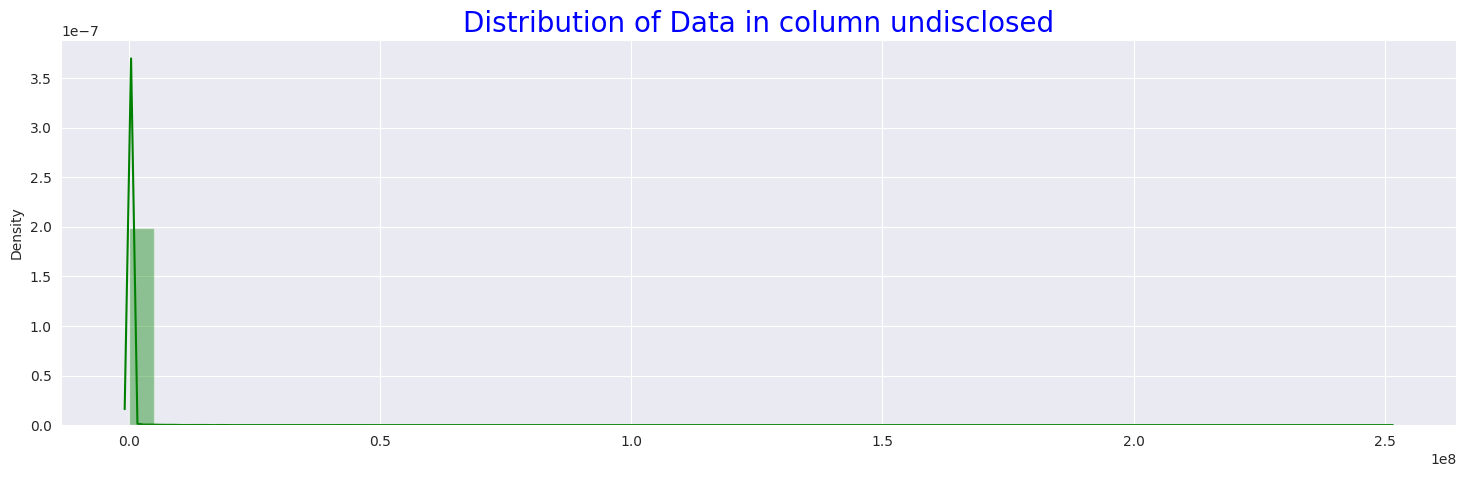

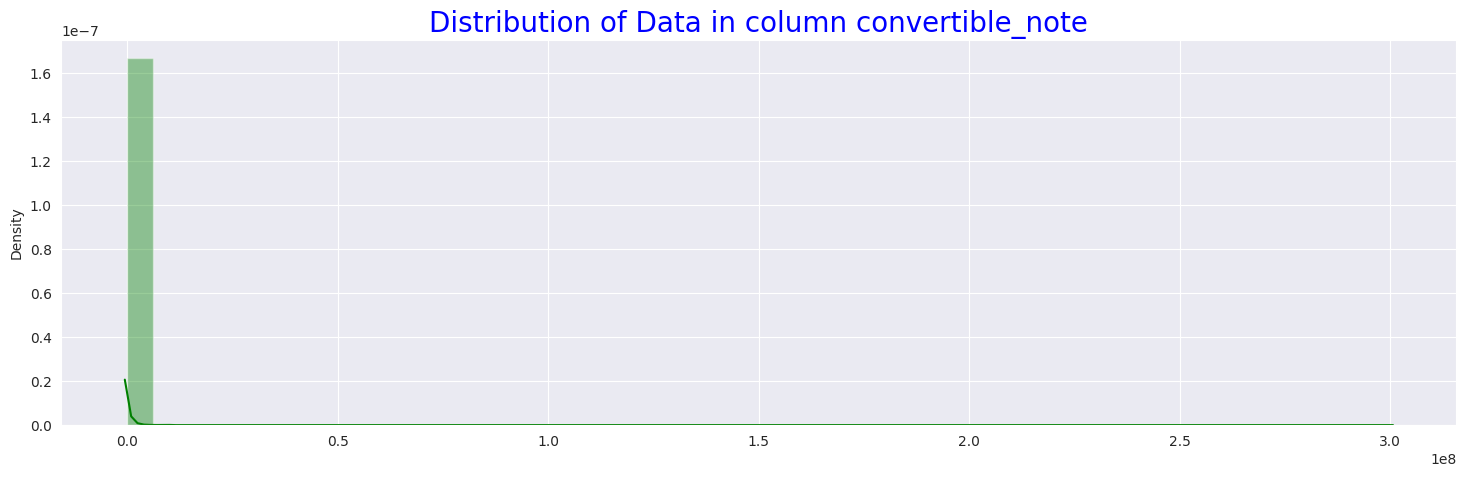

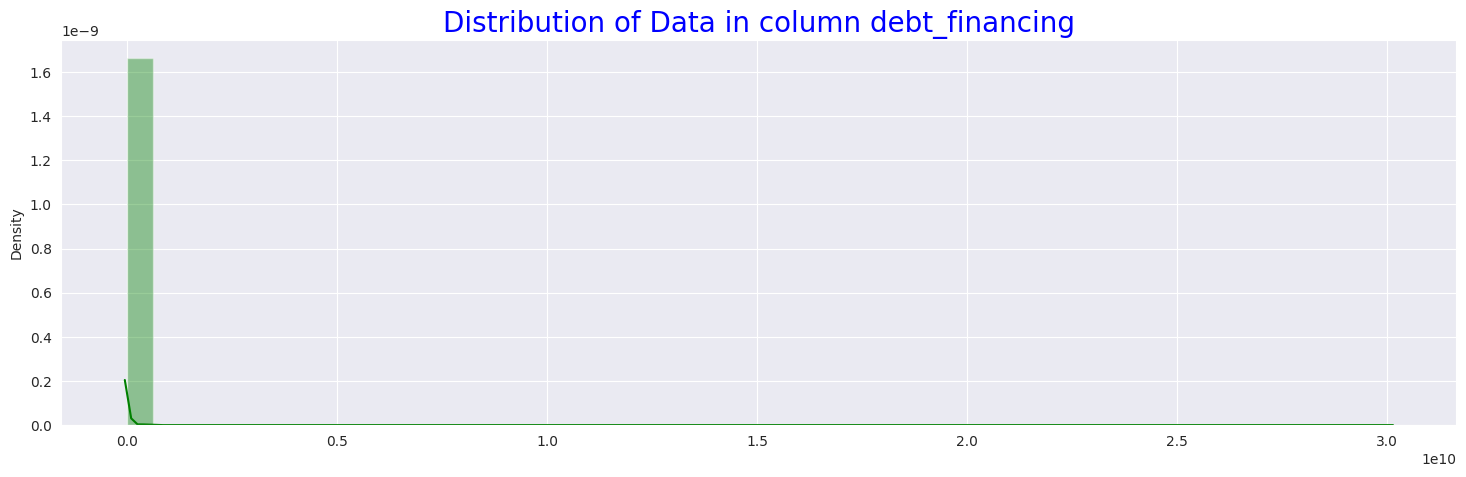

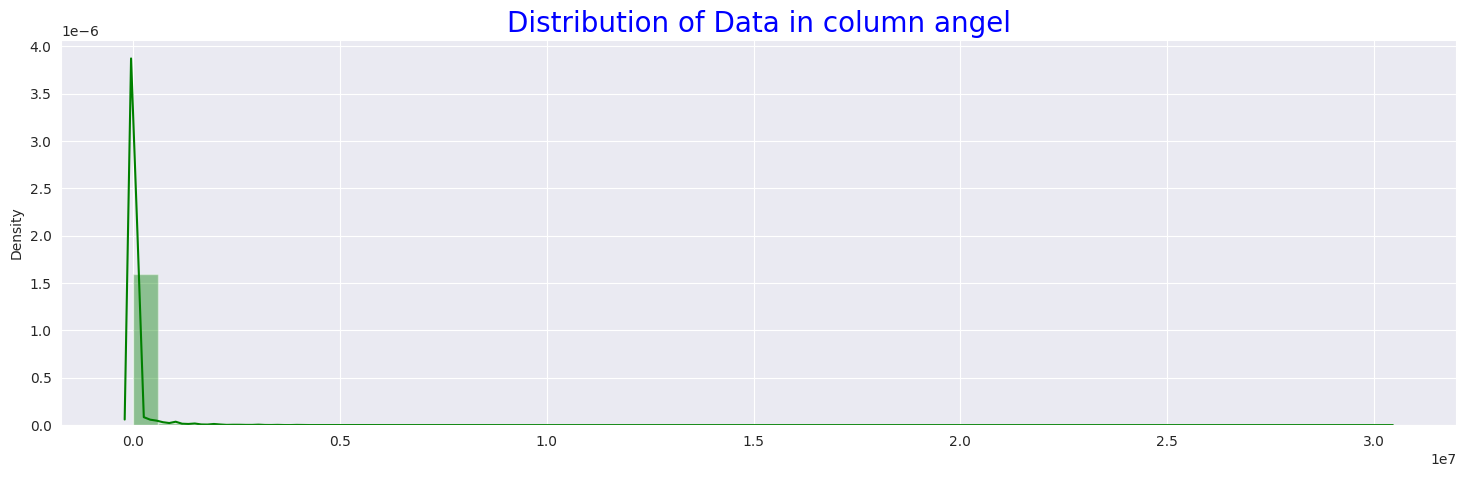

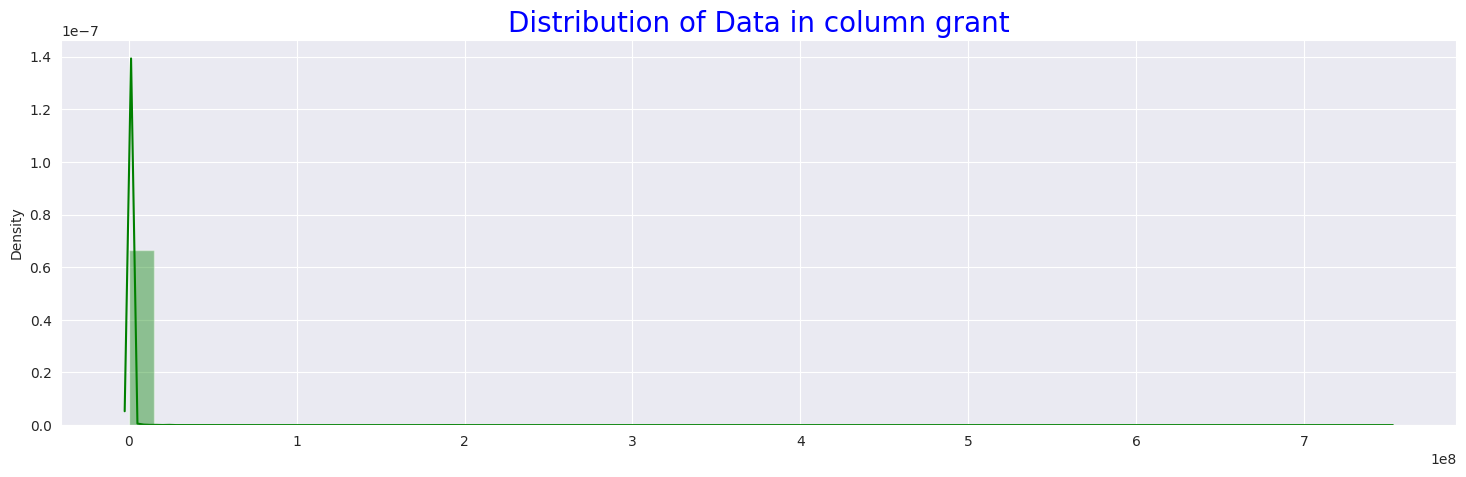

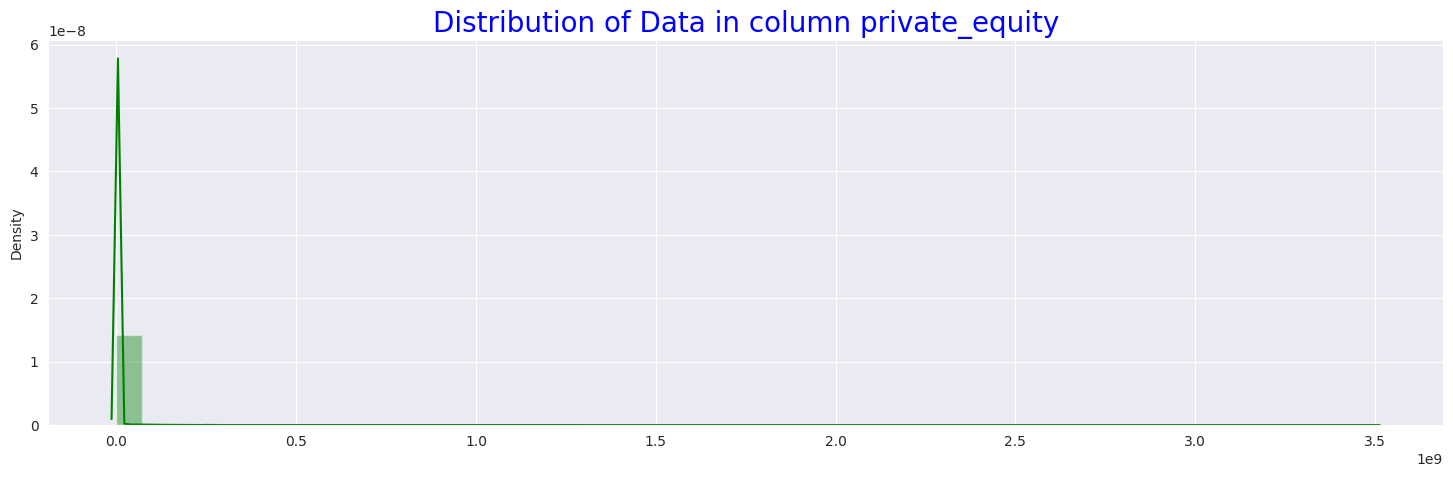

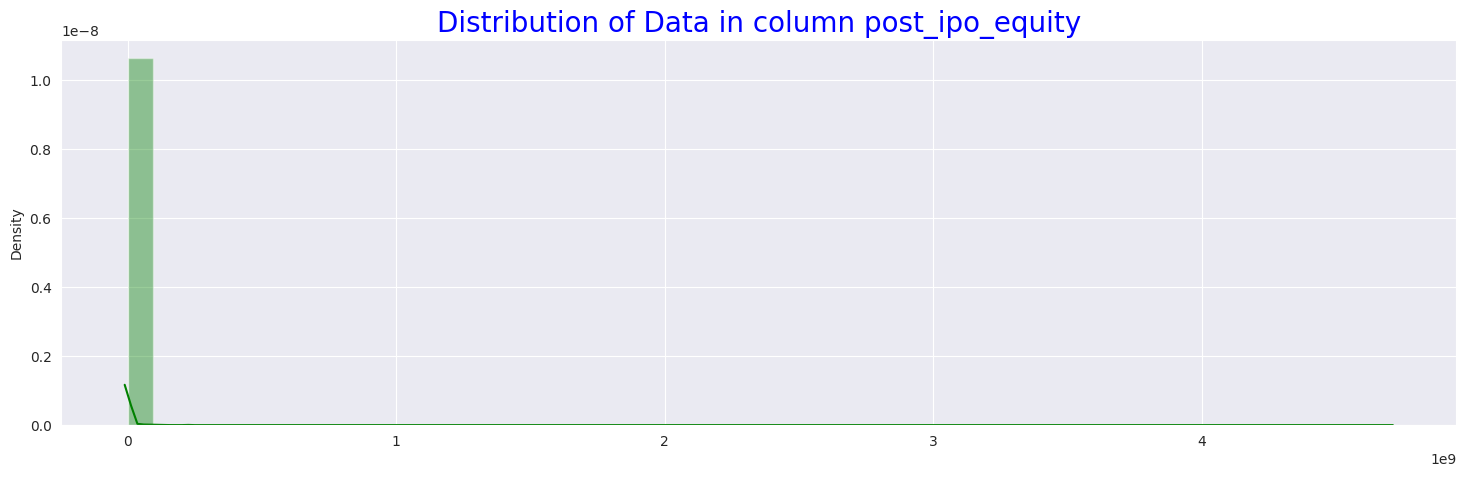

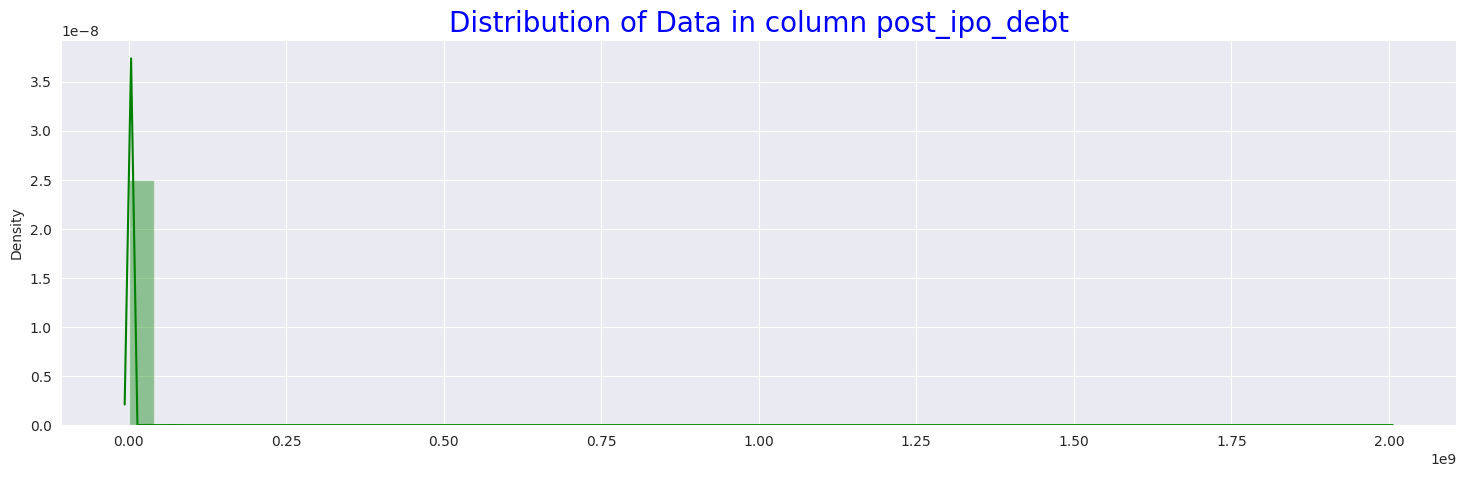

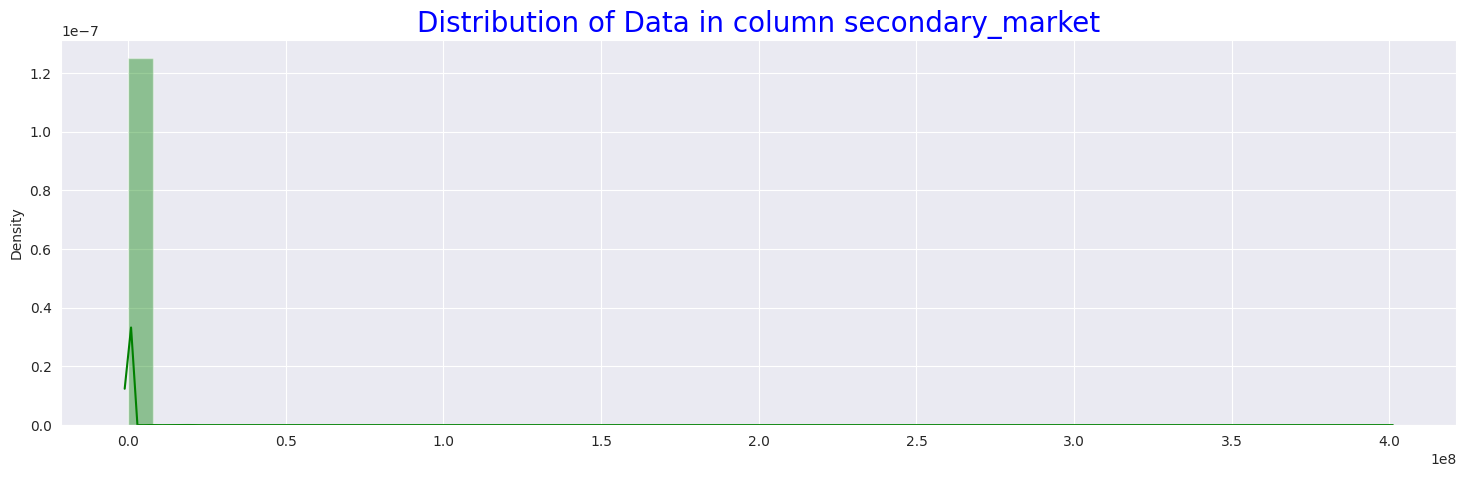

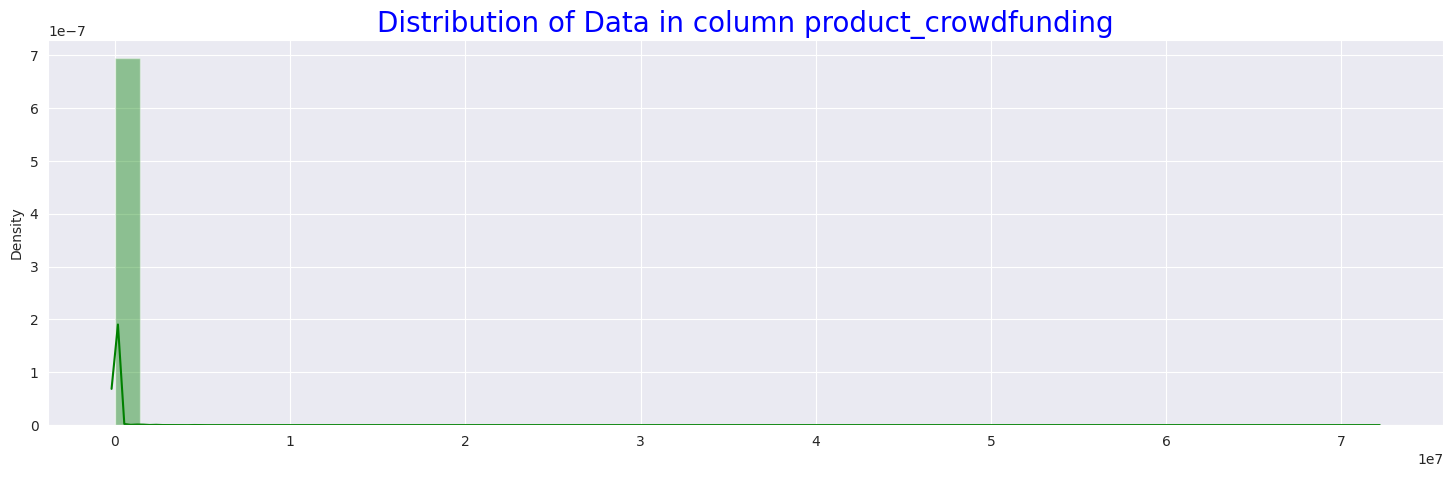

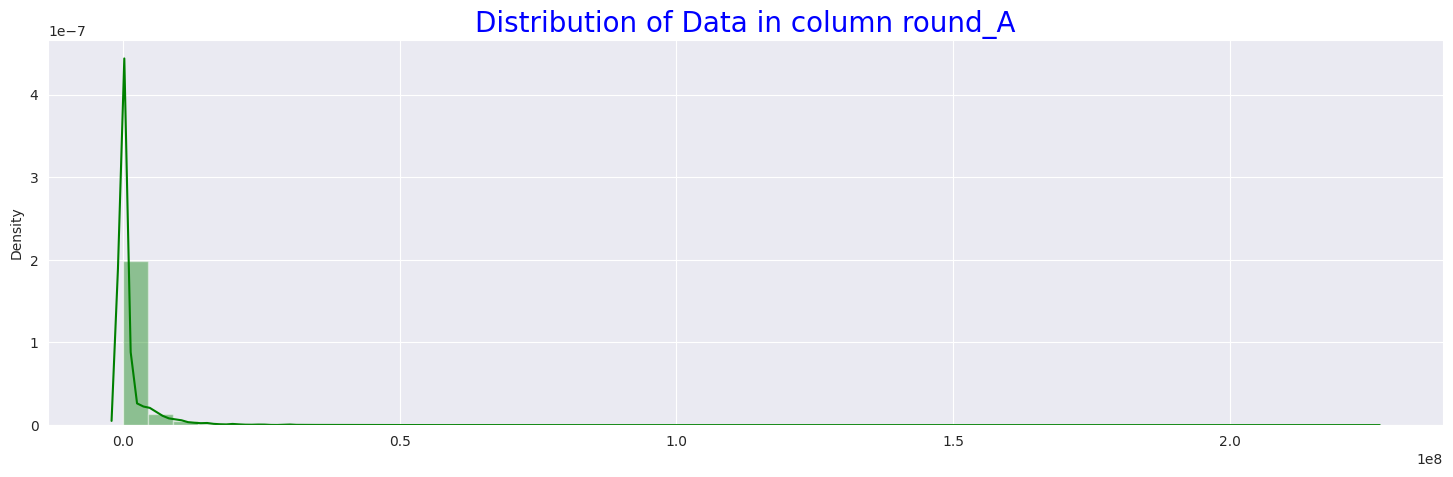

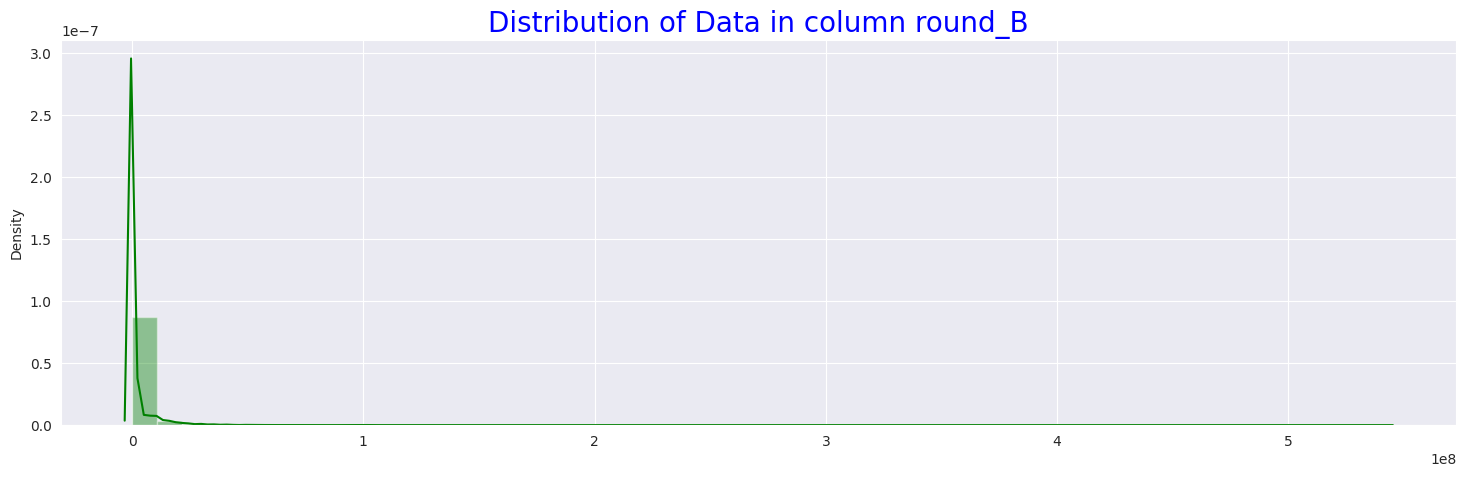

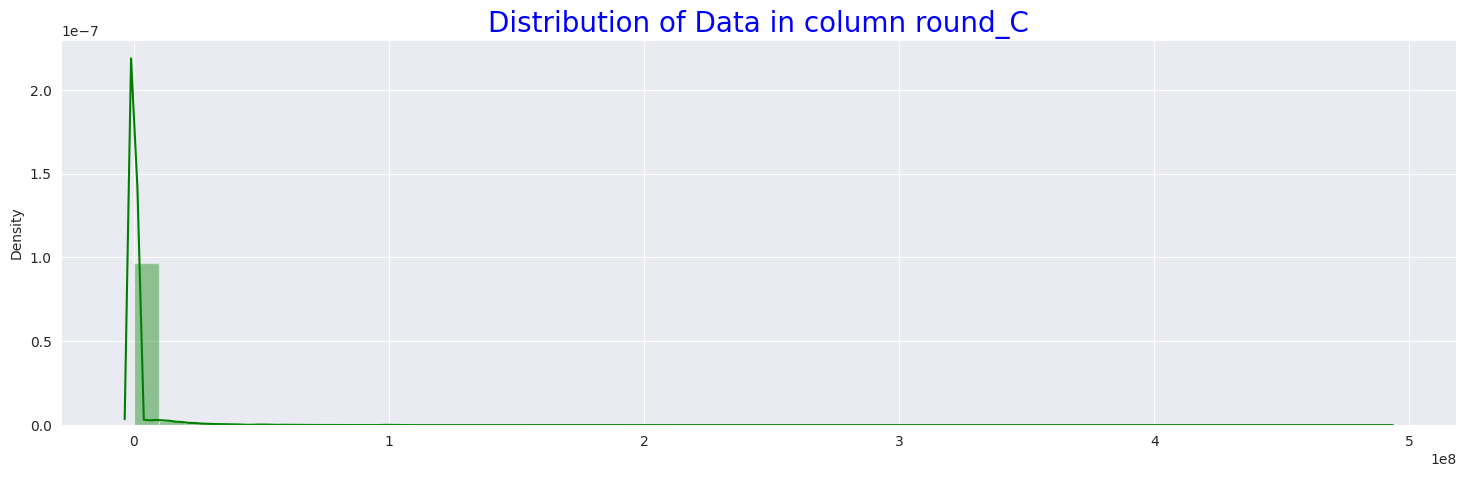

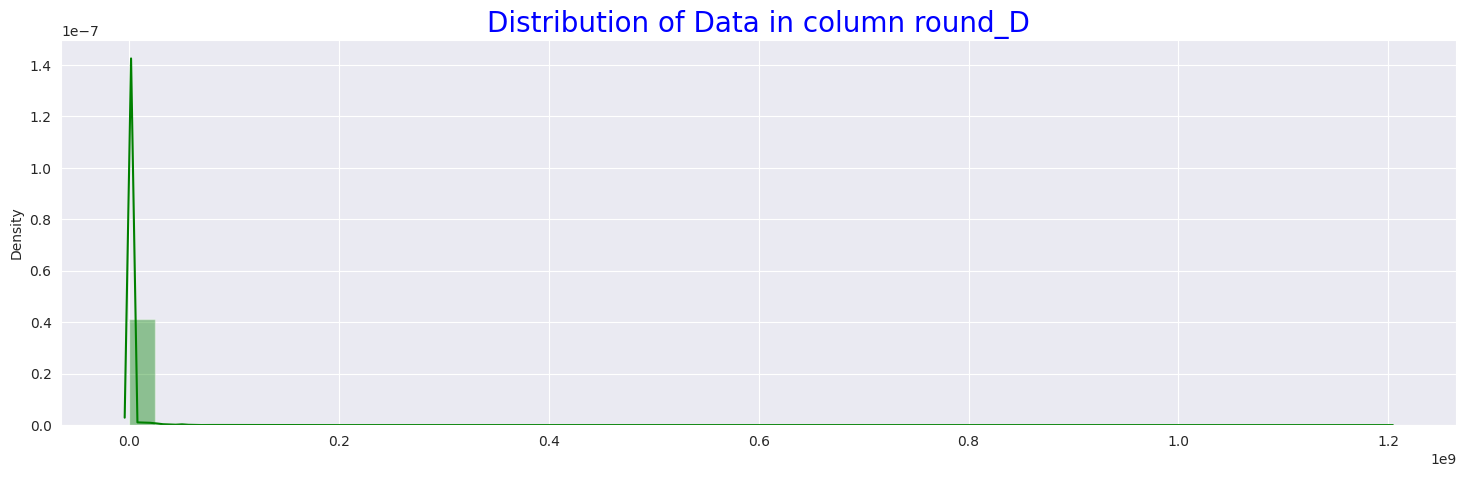

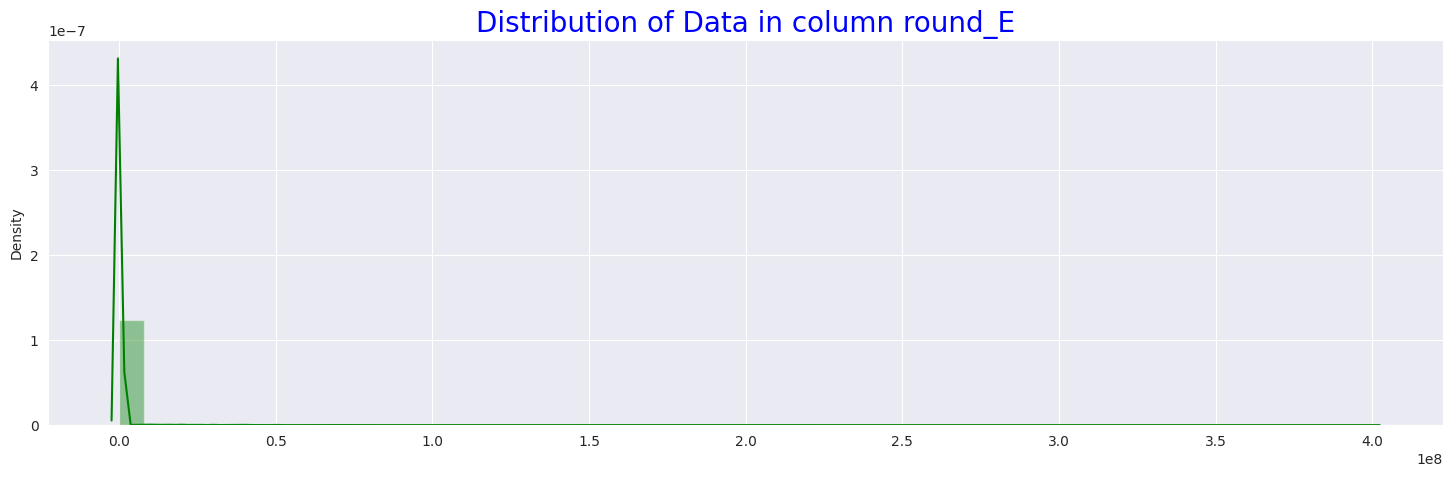

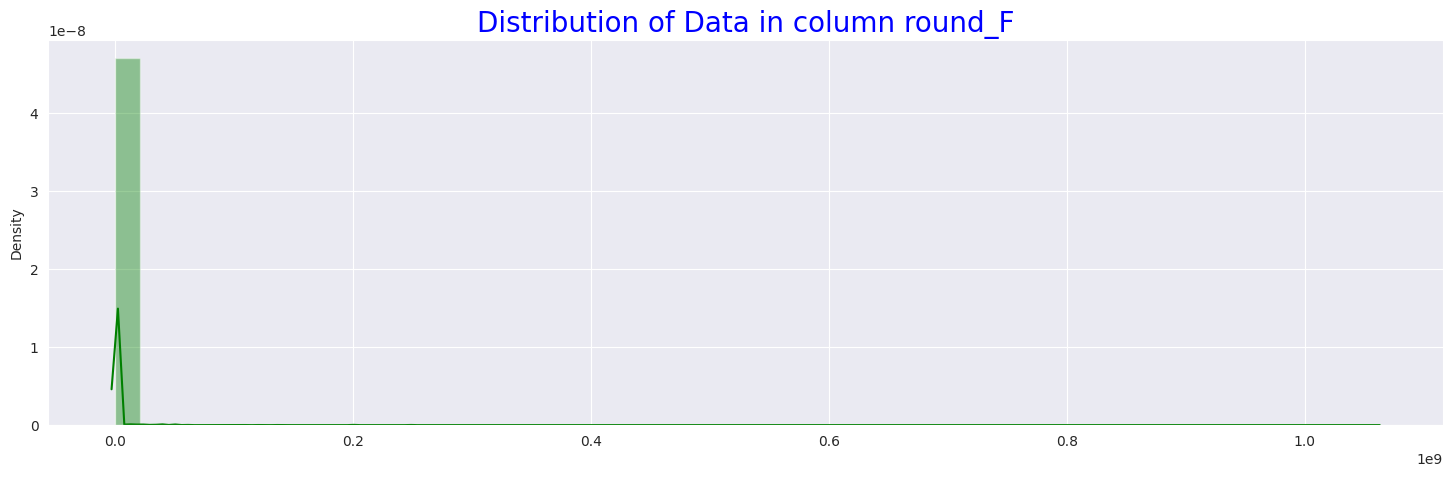

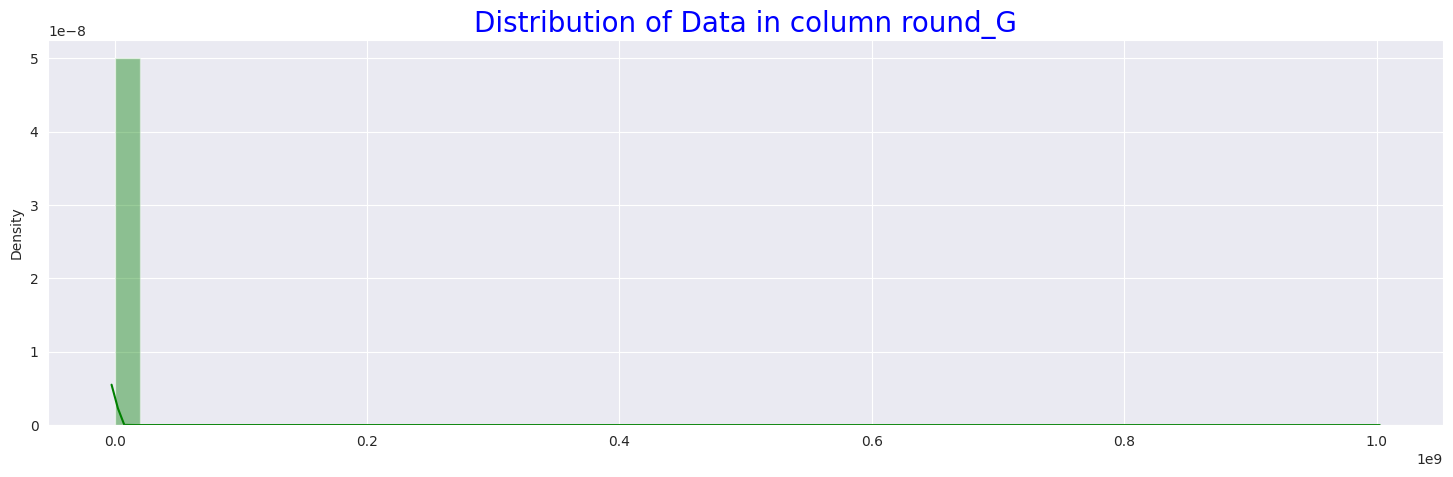

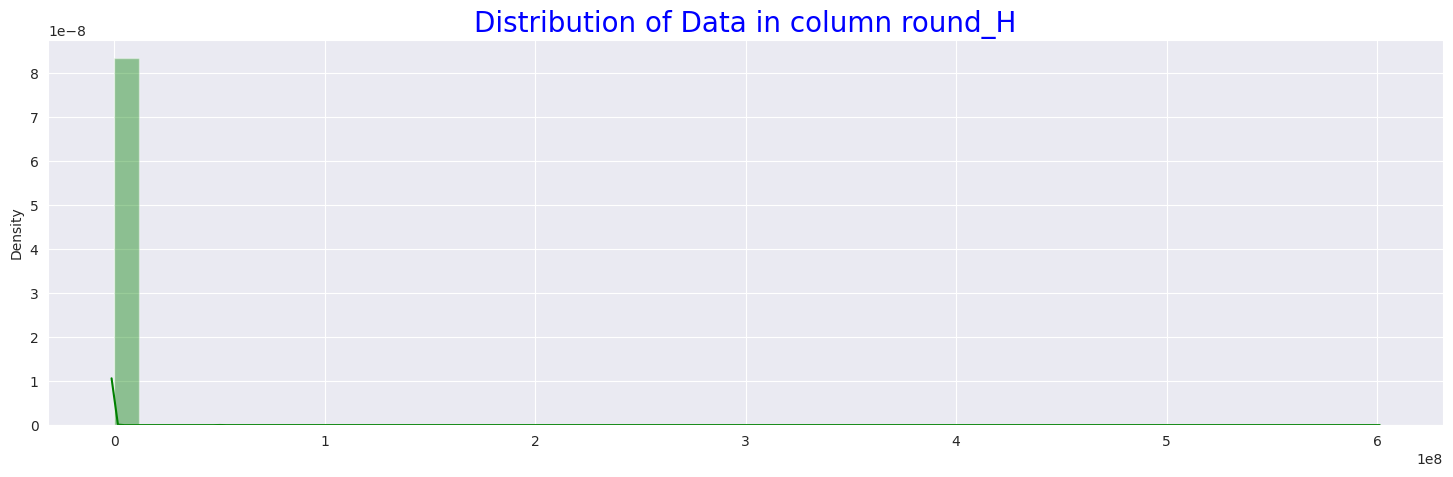

In [21]:
df1 = data.select_dtypes([int, float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.figure(figsize=(18,5))
    sns.distplot(x=df1[col],  color='green');
    plt.title("Distribution of Data in column {}".format(col), fontsize=20, color='blue', fontweight=20)

<h3 style="color:green">Every Numerical column is right skewed ie is tail is extended towards right side.</h3>

<h2 style="color:blue; background:lightgreen; line-height:1.5;">2. Correlation Matrix</h2>

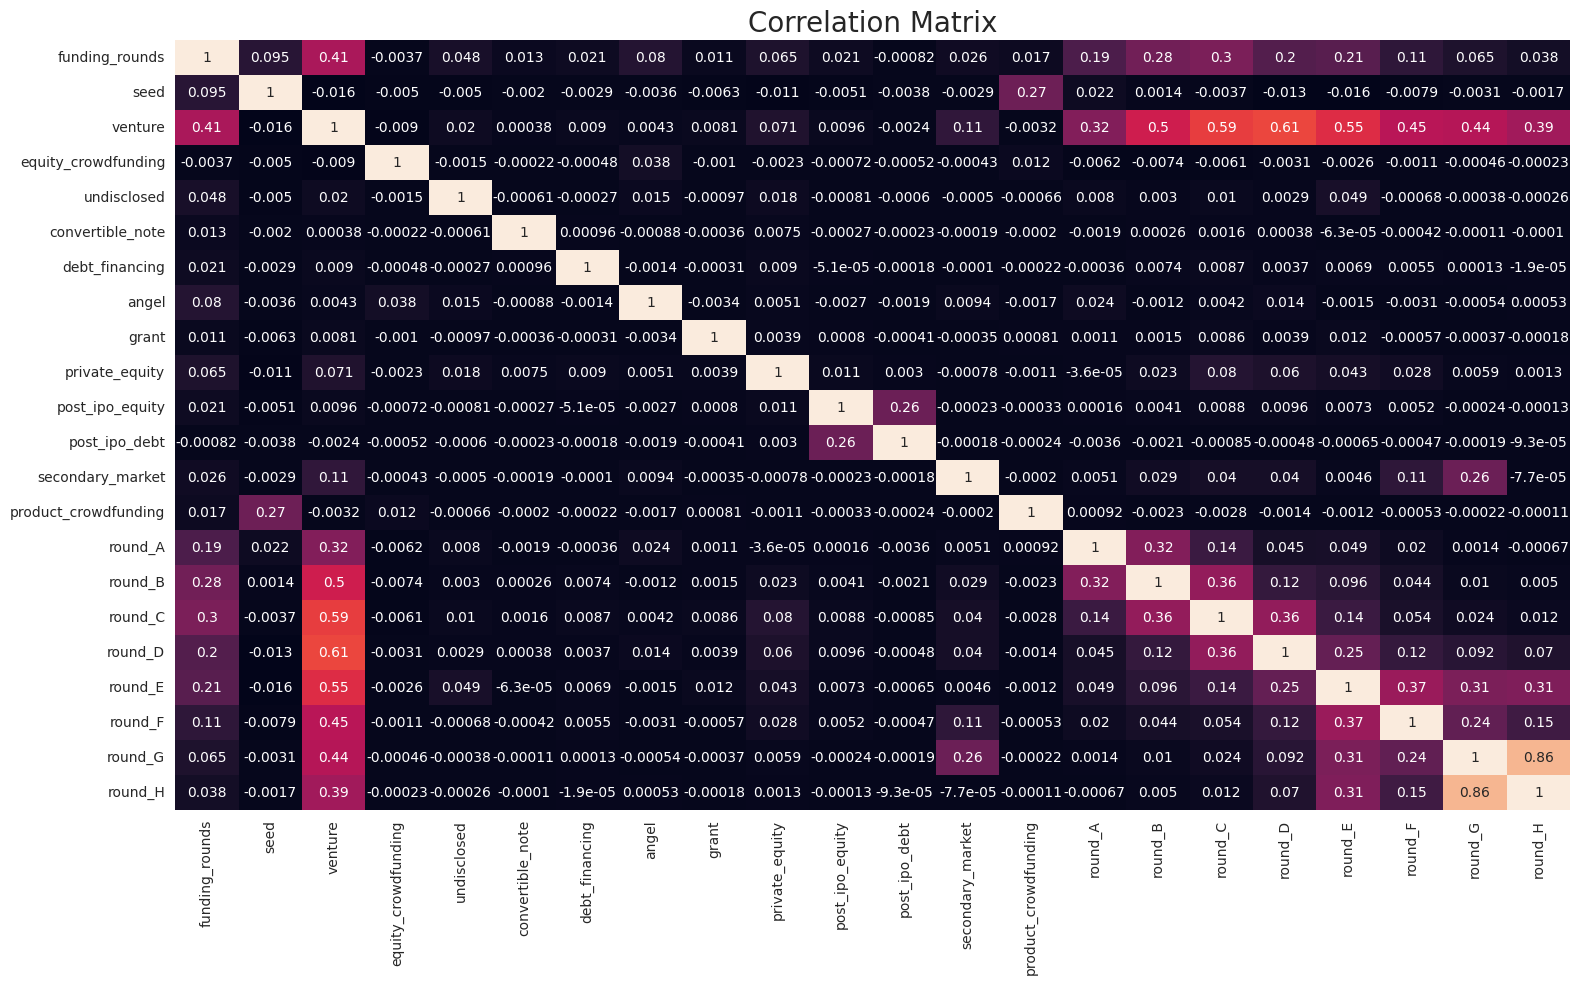

In [22]:
df1 = data.select_dtypes([int, float])

plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(), annot=True, cbar=False)
plt.title("Correlation Matrix", fontsize=20, fontweight=25);

<h2 style="color:blue; font-family:Arial Black; background:pink; line-height:1.5; text-align:center; font-size:30px">Feature Engineering</h2>

In [23]:
data.head()

,name,category_list,market,funding_total_usd,status,country_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,New York City,New York,1.0,2012-06-01,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,"40,000",operating,EST,Tallinn,Tallinn,1.0,2012-10-26,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,London,London,1.0,2011-04-01,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,Dallas,Fort Worth,2.0,2014-01-01,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,004 Technologies,|Software|,Software,-,operating,USA,"Springfield, Illinois",Champaign,1.0,2010-01-01,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
data.columns

Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

### Column name are not in correct format

In [25]:
data.columns=data.columns.str.replace(" ", "")

### In funding_total_usd column when funding is 0 then '-' is used so we will replace '-' with 0.

In [26]:
import re
def clean(text):
    text=re.sub(" +","", text)
    text=re.sub(" ","", text)
    text=re.sub("-","0", text)
    text=re.sub(",","", text)
    return text

data['funding_total_usd']=data['funding_total_usd'].apply(clean)
data['funding_total_usd']=data['funding_total_usd'].astype(float)

### Check all columns data type is correct or not

In [27]:
data.dtypes

name                     object
category_list            object
market                   object
funding_total_usd       float64
status                   object
country_code             object
region                   object
city                     object
funding_rounds          float64
founded_at               object
first_funding_at         object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
round_A                 float64
round_B                 float64
round_C                 float64
round_D                 float64
round_E                 float64
round_F                 float64
round_G 

#### All columns data type is in correct format

<h2 style="color:blue; background:pink; line-height:1.2">Feature Extraction</h2>
<h3 style="color:gray">Here we extract founded year, first funded year, last funded year and drop the original columns containing full date</h3>

In [28]:
data['founded_year']=pd.to_datetime(data['founded_at'], errors = 'coerce').dt.year
data['first_funding_year']=pd.to_datetime(data['first_funding_at'], errors = 'coerce').dt.year
data['last_funding_year']=pd.to_datetime(data['first_funding_at'], errors = 'coerce').dt.year

data.drop(['first_funding_at','last_funding_at','founded_at'], axis=1, inplace=True)

<h2 style="color:blue; background:pink; line-height:1.2">Transform categorical columns to numerical column</h2>

In [29]:
for col in data.columns:
    if data[col].dtype=='object':
        print(f"{col}", data[col].nunique())

name 32790
category_list 13435
market 718
status 3
country_code 106
region 935
city 3435


### Status column is our target variable and it has 3 unique values so use simple replace method to chane this column to numeric type. And for remaining categorical column use label encoding to transform to numeric type.

In [30]:
data['status'].unique()

array(['acquired', 'operating', 'closed'], dtype=object)

In [31]:
data['status'].replace({"acquired":0, "operating":1, "closed":2}, inplace=True)
data['status'].unique()

array([0, 1, 2])

In [32]:
num_columns=[]
cat_columns=[]
for col in data.columns:
    if data[col].dtype=='object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

print("Numerical COlumns", num_columns)
print("--"*10)
print("Categorical Columns", cat_columns)

Numerical COlumns ['funding_total_usd', 'status', 'funding_rounds', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H', 'founded_year', 'first_funding_year', 'last_funding_year']
--------------------
Categorical Columns ['name', 'category_list', 'market', 'country_code', 'region', 'city']


### Transform categorical columns using Label Encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[cat_columns]=data[cat_columns].apply(le.fit_transform)
data.head()

,name,category_list,market,funding_total_usd,status,country_code,region,city,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,founded_year,first_funding_year,last_funding_year
0,0,4160,441,1750000.0,0,102,608,2102,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0,2012.0,2012.0
2,1,9202,518,40000.0,1,33,827,2998,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012.0,2012.0,2012.0
3,2,3753,201,1500000.0,1,36,484,1709,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,2011.0,2011.0
4,3,12245,651,60000.0,1,102,212,1012,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,2014.0,2014.0
8,4,11270,605,0.0,1,102,787,531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0,2014.0,2014.0


<h2 style="color:blue; background:pink; line-height:1.2">Input output split</h2>

In [34]:
data.dropna(axis=0, inplace=True)

In [35]:
X=data.drop('status', axis=1)
y=data['status']

<h2 style="color:blue; background:pink; line-height:1.2">Train Test Silit</h2>

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(26252, 32) (6564, 32) (26252,) (6564,)


<h2 style="color:blue; background:pink; line-height:1.2">Transform Numers using Scaling</h2>

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_tf=scaler.transform(x_train)
x_test_tf=scaler.transform(x_test)
x_train_tf[:5]

array([[ 1.61764980e+00,  1.62603269e+00, -1.54692562e+00,
        -1.90261704e-01, -2.02231555e+00,  1.37960710e+00,
         1.40171498e+00, -6.07502083e-01, -1.26494628e-01,
        -2.73510070e-01, -3.49312960e-02, -4.07331059e-02,
        -5.63035854e-02, -4.94062340e-02, -1.32010270e-01,
        -2.81808264e-02, -6.23590735e-02, -1.92654698e-02,
        -1.47632533e-02, -1.31838027e-02, -1.71774630e-02,
        -2.53977825e-01, -2.10245173e-01, -1.65954382e-01,
        -9.72368699e-02, -7.72715567e-02, -3.02682102e-02,
        -1.41976582e-02, -7.14199476e-03, -1.22996152e-03,
        -1.22592572e+00, -1.22592572e+00],
       [ 1.84155538e-01,  1.02297493e+00,  1.06002968e+00,
        -1.75777310e-01,  6.32723829e-01, -1.80622345e+00,
        -1.70097211e+00,  9.19165944e-02,  7.87465026e-01,
        -2.73510070e-01, -3.49312960e-02, -4.07331059e-02,
        -5.63035854e-02, -4.49565693e-02, -1.32010270e-01,
        -2.81808264e-02, -6.23590735e-02, -1.92654698e-02,
        -1.47

<h2 style="color:blue; background:pink; line-height:1.2">Create Function which build Machine Learning Model, Train, Predict and EValuate</h2>

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
models_dict={
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Ada BOost Classifier":AdaBoostClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "XGBoost Classifier":XGBClassifier()
}

In [40]:
for name, model in models_dict.items():
    print(f'Training Model {name} \n')
    model.fit(x_train_tf, y_train)
    y_pred = model.predict(x_test_tf)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train_tf))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print("Confusion Matrix=\n", confusion_matrix(y_test, y_pred))
    print("Classification Report=\n", classification_report(y_test, y_pred))
    print('*-*'*30)

Training Model Decision Tree Classifier 

Training Accuracy: 1.0
Testing Accuracy: 0.7771176112126752
Confusion Matrix=
 [[ 137  342   54]
 [ 477 4915  311]
 [  38  241   49]]
Classification Report=
               precision    recall  f1-score   support

           0       0.21      0.26      0.23       533
           1       0.89      0.86      0.88      5703
           2       0.12      0.15      0.13       328

    accuracy                           0.78      6564
   macro avg       0.41      0.42      0.41      6564
weighted avg       0.80      0.78      0.79      6564

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model Random Forest Classifier 

Training Accuracy: 0.999923815328356
Testing Accuracy: 0.8651736745886655
Confusion Matrix=
 [[  33  498    2]
 [  46 5643   14]
 [   3  322    3]]
Classification Report=
               precision    recall  f1-score   support

           0       0.40      0.06      0.11       533
     

## Accuracy is hight in all the models but f1 score for all three class are not nearly equal, one class dominating over other class due to class imbalance. Using SMOTE oversampling technique increase the sample of lower class.

In [41]:
from imblearn.over_sampling import BorderlineSMOTE
smote=BorderlineSMOTE()
x_resample, y_resample=smote.fit_resample(X, y)

In [42]:
y_resample.value_counts()

0    28362
1    28362
2    28362
Name: status, dtype: int64

<h2 style="color:blue; background:pink; line-height:1.2">Train test split</h2>


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_resample, y_resample, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(68068, 32) (68068,) (17018, 32) (17018,)


<h2 style="color:blue; background:pink; line-height:1.2">Transform Numers using Scaling</h2>

In [44]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_tf=scaler.transform(x_train)
x_test_tf=scaler.transform(x_test)
x_train_tf[:5]

array([[-0.49491291, -1.25601998, -1.3014257 , -0.19423326, -0.7790637 ,
         1.17272303, -0.23957939, -0.63412195, -0.2720738 , -0.25072866,
        -0.02087325, -0.04722752, -0.01205026, -0.04479841, -0.15127644,
        -0.02047056, -0.06772161, -0.01888071, -0.01001356, -0.00877114,
        -0.01078918,  0.30250005, -0.30076395, -0.22652271, -0.10911727,
        -0.07862042, -0.02647746, -0.00875885, -0.00443529, -0.14950444,
        -0.48833135, -0.48833135],
       [-0.17902184, -1.81134111, -1.0422518 ,  0.04835819,  0.6458597 ,
         0.82164311,  0.94361646,  0.90588742, -0.2720738 ,  0.1986939 ,
        -0.02087325,  0.53529851, -0.01205026, -0.04479841, -0.15127644,
        -0.02047056, -0.06772161, -0.01888071, -0.01001356, -0.00877114,
        -0.01078918, -0.33543932,  1.68367073, -0.22652271, -0.10911727,
        -0.07862042, -0.02647746, -0.00875885, -0.00443529,  0.63513728,
        -0.74013135, -0.74013135],
       [ 0.30914232,  0.37321656, -0.23362926,  0.2489

<h2 style="color:blue; background:pink; line-height:1.2">Build, train, predict and Evaluate models</h2>

In [45]:
for name, model in models_dict.items():
    print(f'Training Model {name} \n')
    model.fit(x_train_tf, y_train)
    y_pred = model.predict(x_test_tf)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train_tf))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print("Confusion Matrix=\n", confusion_matrix(y_test, y_pred))
    print("Classification Report=\n", classification_report(y_test, y_pred))
    print('*-*'*30)

Training Model Decision Tree Classifier 

Training Accuracy: 1.0
Testing Accuracy: 0.8892936890351393
Confusion Matrix=
 [[5040  385  244]
 [ 510 4797  312]
 [ 184  249 5297]]
Classification Report=
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      5669
           1       0.88      0.85      0.87      5619
           2       0.91      0.92      0.91      5730

    accuracy                           0.89     17018
   macro avg       0.89      0.89      0.89     17018
weighted avg       0.89      0.89      0.89     17018

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model Random Forest Classifier 

Training Accuracy: 1.0
Testing Accuracy: 0.9351862733576214
Confusion Matrix=
 [[5304  249  116]
 [ 314 5151  154]
 [  86  184 5460]]
Classification Report=
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      5669
           1       

## After Oversampling Accuracy and f1 score for all the classes increased. Random Forest giving highest accuracy of 94% with f1 score for all classes are equal and high.

### Using Random Forest Classifier as our best model tune the parameter using GridSearchCV and check whether the accuracy increases or not.

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5],
    'criterion' :['gini', 'entropy']}

grid=GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid.fit(x_train_tf, y_train)
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150}


### Use the best parameters to train the random forest model

In [53]:
rf=RandomForestClassifier(criterion='entropy', max_depth=None, n_estimators=150, max_features='sqrt')
rf.fit(x_train_tf, y_train)
y_pred=rf.predict(x_test_tf)
print(f'Training Accuracy: {accuracy_score(y_train, rf.predict(x_train_tf))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print("Confusion Matrix=\n", confusion_matrix(y_test, y_pred))
print("Classification Report=\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9358326477846985
Confusion Matrix=
 [[5297  253  119]
 [ 312 5162  145]
 [  76  187 5467]]
Classification Report=
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5669
           1       0.92      0.92      0.92      5619
           2       0.95      0.95      0.95      5730

    accuracy                           0.94     17018
   macro avg       0.94      0.94      0.94     17018
weighted avg       0.94      0.94      0.94     17018



## Accuracy increased by 0.01%.